# Data Exploration

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from scipy.stats import ttest_ind
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_excel('Dataset.xlsx')

## Clean Data

In [3]:
# Get the list of columns to convert to categorical
categorical_columns = df.select_dtypes(include='int64').columns.tolist()

# Convert the selected columns to categorical
df[categorical_columns] = df[categorical_columns].astype('category')

numeric_data = df.select_dtypes(include=[np.number])

# Calculate MAD for each column
mad = numeric_data.mad()

# Choose a threshold multiplier
k = 3

# Calculate the threshold value
threshold = k * mad

# Identify outliers
outliers = (np.abs(numeric_data - numeric_data.median()) > threshold)

# Apply logarithm to the specified columns
outlier_columns = ['CommissionSacrificePercentage', 'BonusCommissionPercentage']
for column in outlier_columns:
    df[column] = np.log1p(df[column])

numeric_data = df.select_dtypes(include=[np.number])

# Check that all outliers have been handled
outliers = (np.abs(numeric_data - numeric_data.median()) > threshold)

# Count the number of outliers in each column
outlier_counts = outliers.sum()

# Create a new DataFrame from outlier_counts
outlier_table = pd.DataFrame({'Column': outlier_counts.index, 'Outlier Count': outlier_counts.values})

# Display the table
print(outlier_table)

                          Column  Outlier Count
0  CommissionSacrificePercentage              0
1      BonusCommissionPercentage              0


## Descriptive Statistics

### Numeric Data

In [4]:
numeric_data.describe()

,CommissionSacrificePercentage,BonusCommissionPercentage
count,157263.000000,157263.000000
mean,0.581488,1.455217
std,1.549422,1.499236
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.223775
75%,0.000000,3.044522
max,5.302807,4.069027


According to the data summary, the majority records have a commission sacrifice percentage of 0, suggesting that they do not sacrifice any of their commission. The bonus commission %, on the other hand, varies substantially, with the majority of records getting a bonus commission between 0 and 3.044522.

#### Box Plots

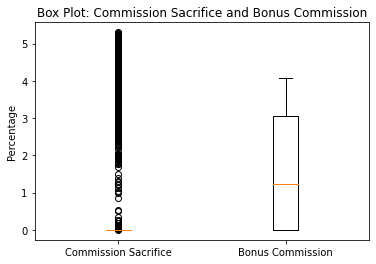

In [5]:
# Create a box plot for CommissionSacrificePercentage and BonusCommissionPercentage
plt.boxplot([df['CommissionSacrificePercentage'], df['BonusCommissionPercentage']])
plt.xticks([1, 2], ['Commission Sacrifice', 'Bonus Commission'])
plt.ylabel('Percentage')
plt.title('Box Plot: Commission Sacrifice and Bonus Commission')
plt.show()

#### Violin Plots

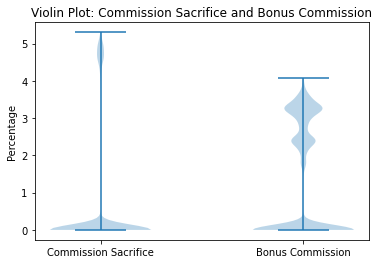

In [6]:
# Create a violin plot for CommissionSacrificePercentage and BonusCommissionPercentage
plt.violinplot([df['CommissionSacrificePercentage'], df['BonusCommissionPercentage']])
plt.xticks([1, 2], ['Commission Sacrifice', 'Bonus Commission'])
plt.ylabel('Percentage')
plt.title('Violin Plot: Commission Sacrifice and Bonus Commission')
plt.show()

#### Density Plots

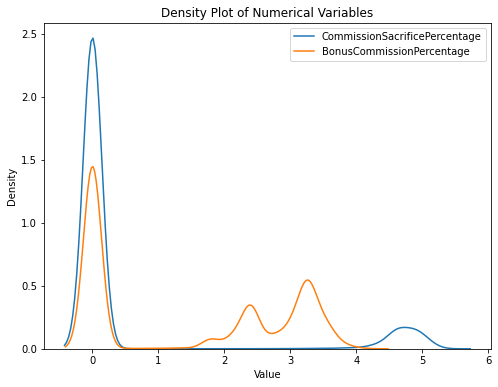

In [7]:
# Plot density plot for numerical variables
plt.figure(figsize=(8, 6))
for column in numeric_data:
    sns.kdeplot(data=df[column], label=column)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot of Numerical Variables')
plt.legend()
plt.show()

#### Histograms & QQ Plots

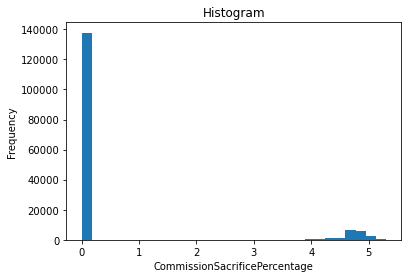

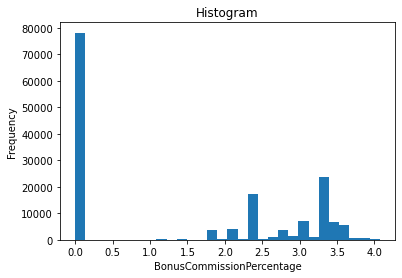

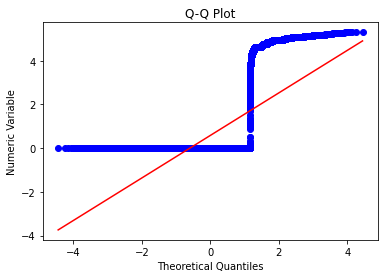

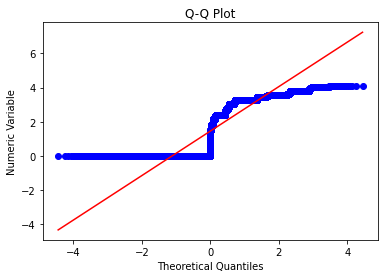

In [8]:
# Visual inspection - Histogram
for column in numeric_data:
    plt.hist(df[column], bins=30)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()

# Visual inspection - Q-Q plot
for column in numeric_data:
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Numeric Variable')
    plt.title('Q-Q Plot')
    plt.show()

While it is clear that these two variables do not meet the assumption of normality, it would have been expected prior to carrying out the descriptive statistics investigation that the majority of the values for both of these variables would either be zero or skew towards zero. With this in mind, the assumption of normality may be questioned in this specific case.

### Categorical Variables

Extract elements such as day of month, day of week, month, and year from a date variable, treat these as categorical variables

In [9]:
# Extract day of the week from the time/date variable
df['day_of_week'] = df['PropDate'].dt.weekday

# Convert day of the week to categorical variable
day_of_week_labels = ['0', '1', '2', '3', '4', '5', '6']
df['day_of_week'] = df['day_of_week'].map(lambda x: day_of_week_labels[x])

In [10]:
df['day_of_month'] = df['PropDate'].dt.day
df['month'] = df['PropDate'].dt.month
df['year'] = df['PropDate'].dt.year

In [11]:
df['year'] = df['year'].astype(str)

In [12]:
categorical_columns = df.select_dtypes(include='int64').columns.tolist()
df[categorical_columns] = df[categorical_columns].astype('category')

numeric_data = df.select_dtypes(include=[np.number])

categorical_columns = df.select_dtypes(include='object').columns.tolist()
df[categorical_columns] = df[categorical_columns].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157263 entries, 0 to 157262
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Product                        157263 non-null  category      
 1   ProductGroup                   157263 non-null  category      
 2   ProductType                    157263 non-null  category      
 3   Agency                         157263 non-null  category      
 4   WorkflowStatus                 157263 non-null  category      
 5   Indexation                     157263 non-null  category      
 6   NoOfLives                      157263 non-null  category      
 7   PropDate                       157263 non-null  datetime64[ns]
 8   CommDateProvided               157263 non-null  category      
 9   PaymentFreq                    157263 non-null  category      
 10  UWDecision                     157263 non-null  category      
 11  

In [14]:
# Create an empty dictionary to store frequency distributions
frequency_distributions = {}

# Loop through each categorical variable
for column in df.select_dtypes(include='category'):
    # Calculate the frequency distribution for the current categorical variable
    frequency_distribution = df[column].value_counts()
    
    # Store the frequency distribution in the dictionary with the variable name as the key
    frequency_distributions[column] = frequency_distribution

    # Display the frequency distribution for the current variable
    print(f"Frequency Distribution for {column}:")
    print(frequency_distribution)
    print()

Frequency Distribution for Product:
3    73034
6    66836
2     9275
7     5511
4     1500
5     1059
1       48
Name: Product, dtype: int64

Frequency Distribution for ProductGroup:
4    82681
2    73034
3     1500
1       48
Name: ProductGroup, dtype: int64

Frequency Distribution for ProductType:
3    142429
2      9275
4      5511
1        48
Name: ProductType, dtype: int64

Frequency Distribution for Agency:
682     18438
525      9682
551      4847
312      4789
1593     3621
        ...  
214         1
685         1
215         1
218         1
1           1
Name: Agency, Length: 1648, dtype: int64

Frequency Distribution for WorkflowStatus:
4    77580
1    77246
5     2298
2      121
3       18
Name: WorkflowStatus, dtype: int64

Frequency Distribution for Indexation:
0    123679
1     33584
Name: Indexation, dtype: int64

Frequency Distribution for NoOfLives:
2    90553
1    66710
Name: NoOfLives, dtype: int64

Frequency Distribution for CommDateProvided:
0    126485
1     3077

#### Bar Plots

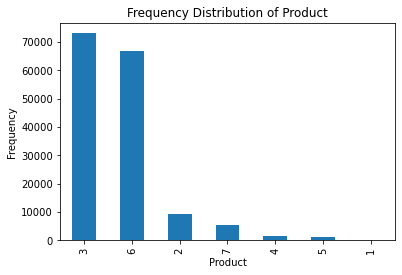

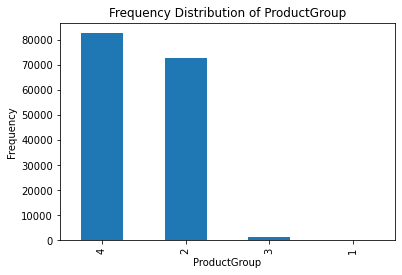

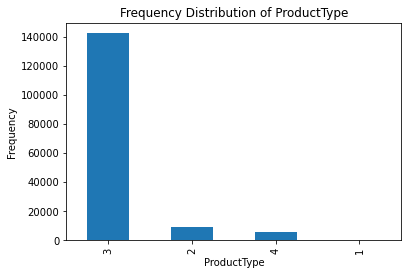

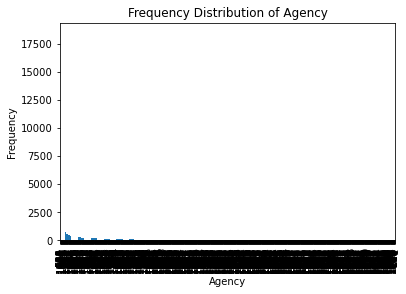

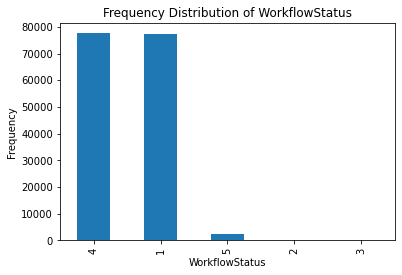

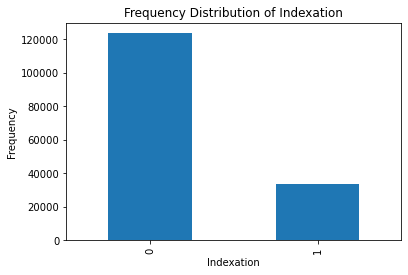

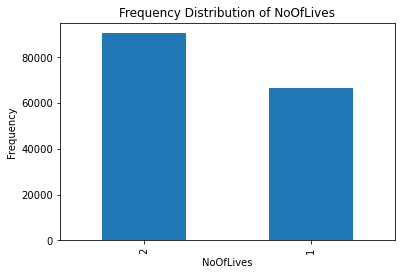

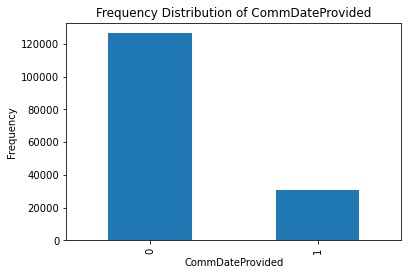

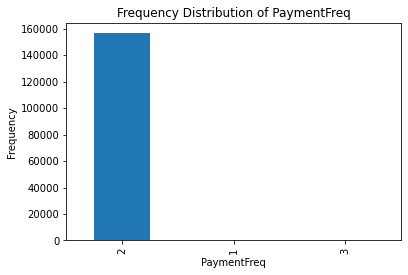

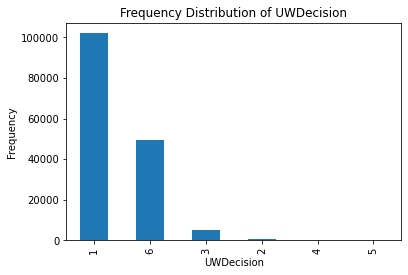

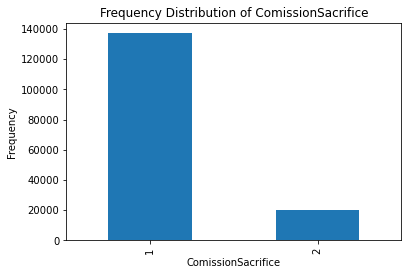

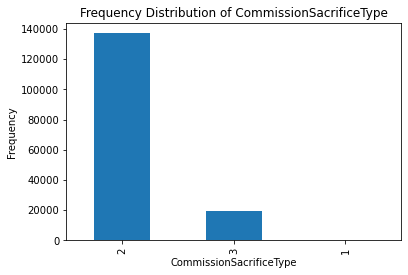

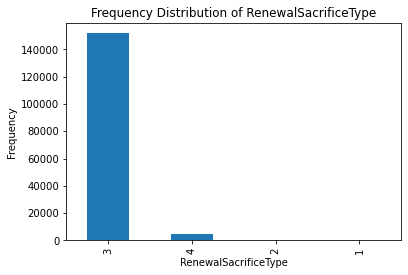

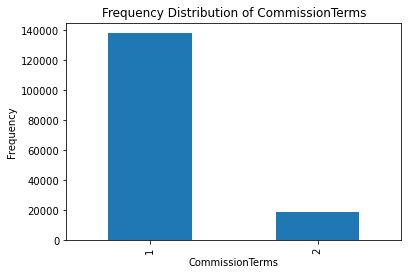

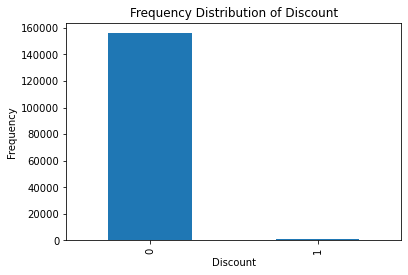

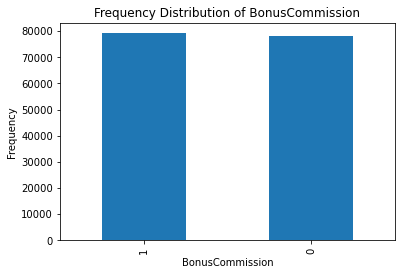

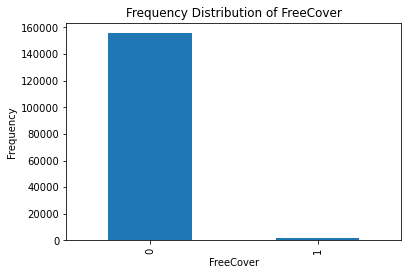

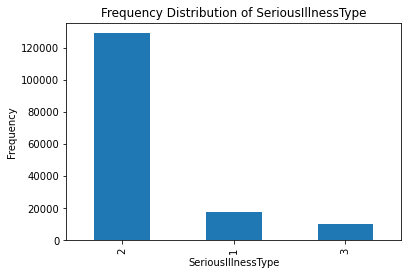

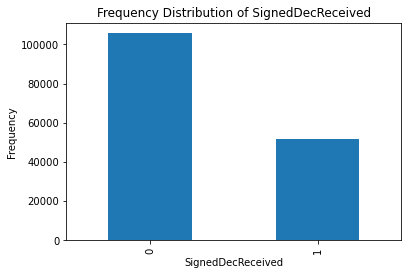

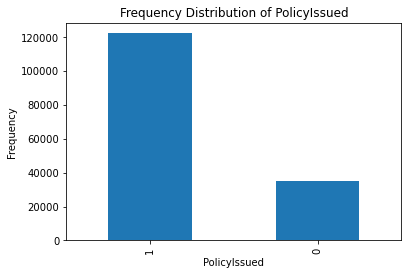

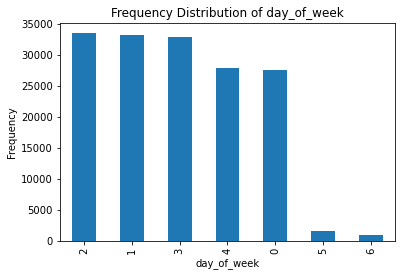

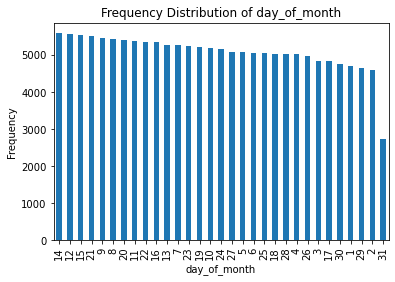

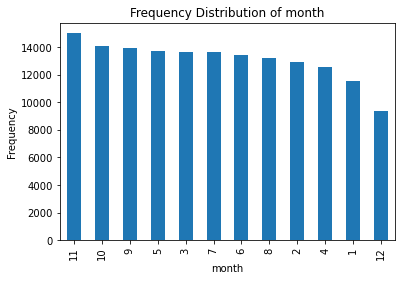

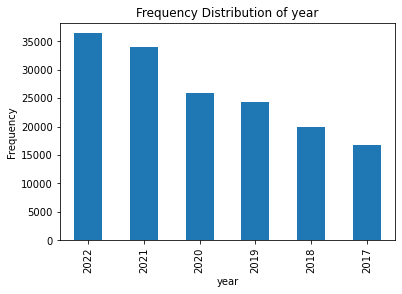

In [15]:
# Loop through each categorical variable
for column in df.select_dtypes(include='category'):
    # Calculate the frequency distribution for the current categorical variable
    frequency_distribution = df[column].value_counts()

    # Create a bar plot for the frequency distribution
    plt.figure()
    frequency_distribution.plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f"Frequency Distribution of {column}")
    plt.show()


Across several variables, certain groups dominate the dataset. Product 3 and ProductGroup 4 are the most common in their respective variables, whereas Agency 682 and WorkflowStatus 4 also appear often. Some categories, on the other hand, have a low occurrence rate, such as Product 1 and WorkflowStatus 3. These frequency distributions aid in comprehending the distribution of categorical variables, identifying frequent or uncommon categories, and emphasising the relevance of certain categories in connection to the target variable. These insights can help drive future project analysis, decision-making, and feature engineering.

#### Cross-tabulations

In [16]:
# Perform cross-tabulations between each categorical variable and the target variable
for column in df.select_dtypes(include='category'):
    cross_tab = pd.crosstab(df[column], df['PolicyIssued'])
    
    # Display the cross-tabulation
    print(f"Cross-Tabulation: {column} vs. TargetVariable")
    print(cross_tab)
    print()

Cross-Tabulation: Product vs. TargetVariable
PolicyIssued      0      1
Product                   
1                 1     47
2              2713   6562
3             13097  59937
4               302   1198
5               267    792
6             16264  50572
7              2216   3295

Cross-Tabulation: ProductGroup vs. TargetVariable
PolicyIssued      0      1
ProductGroup              
1                 1     47
2             13097  59937
3               302   1198
4             21460  61221

Cross-Tabulation: ProductType vs. TargetVariable
PolicyIssued      0       1
ProductType                
1                 1      47
2              2713    6562
3             29930  112499
4              2216    3295

Cross-Tabulation: Agency vs. TargetVariable
PolicyIssued    0   1
Agency               
1               0   1
2               7  20
3              10  36
4              16  85
5               6  50
...           ...  ..
1644            7   0
1645            8   0
1646            

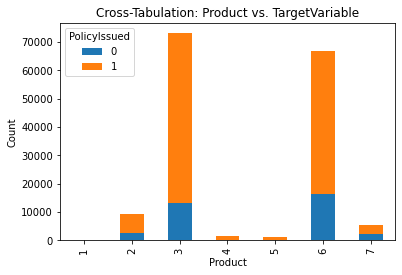

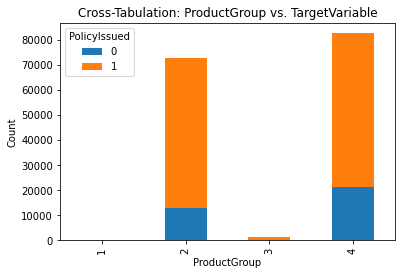

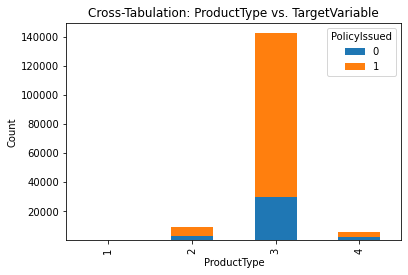

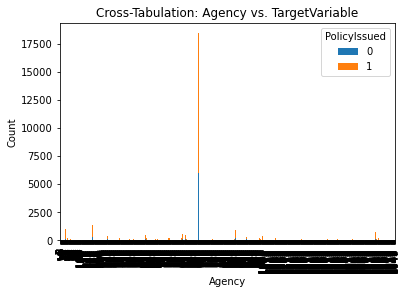

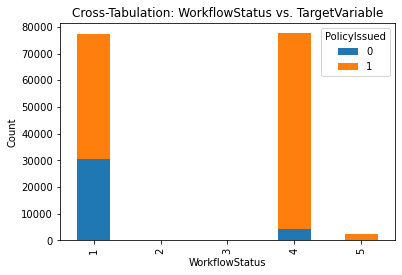

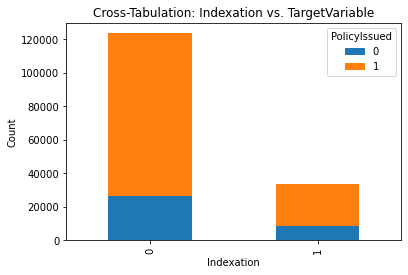

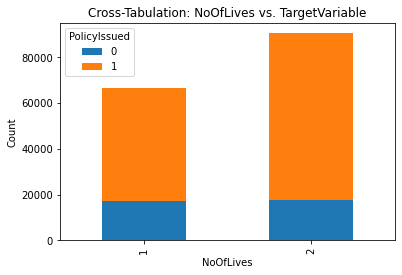

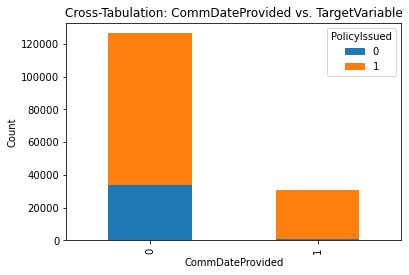

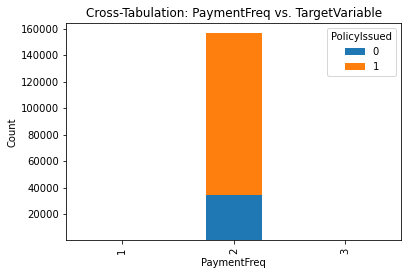

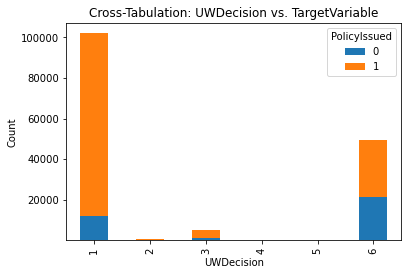

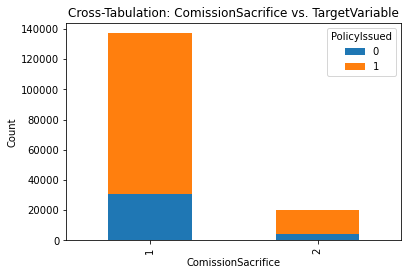

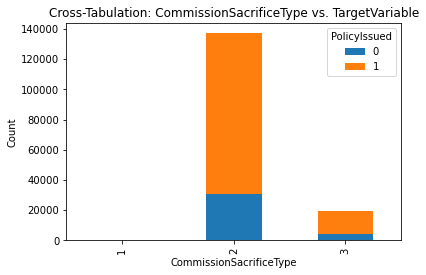

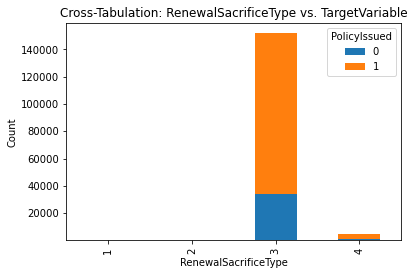

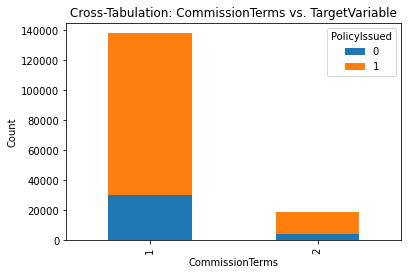

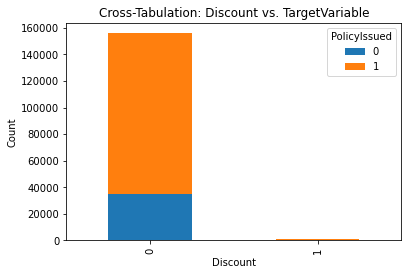

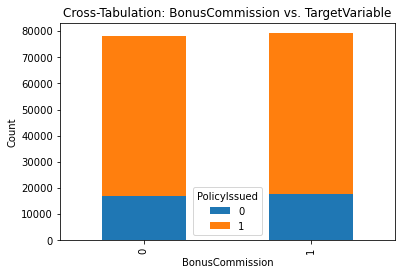

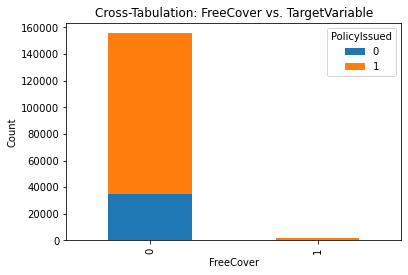

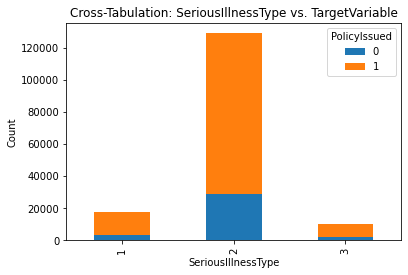

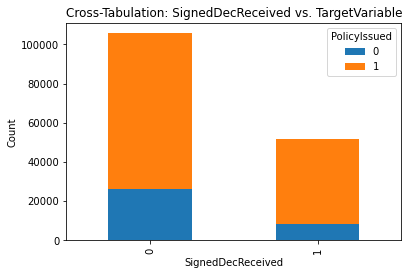

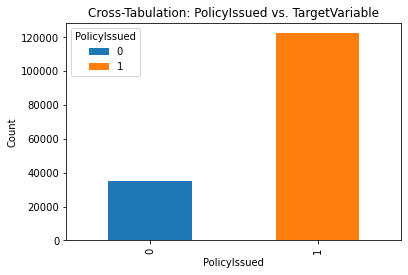

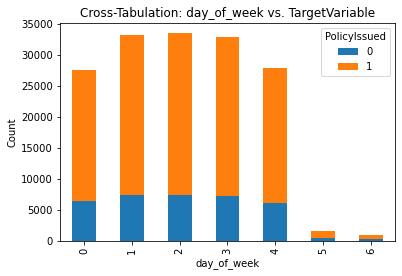

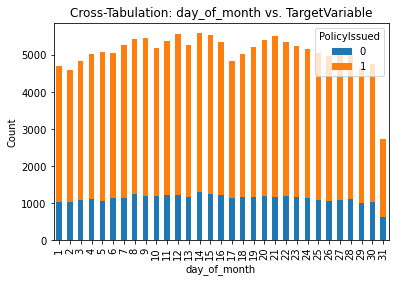

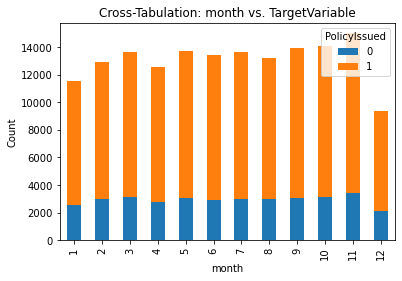

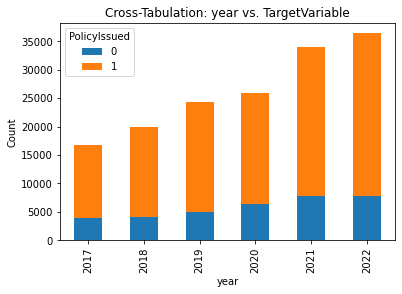

In [17]:
# Perform cross-tabulations between each categorical variable and the target variable
for column in df.select_dtypes(include='category'):
    cross_tab = pd.crosstab(df[column], df['PolicyIssued'])
    
    # Plot the cross-tabulation as a stacked bar plot
    cross_tab.plot(kind='bar', stacked=True)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f"Cross-Tabulation: {column} vs. TargetVariable")
    plt.legend(title='PolicyIssued')
    plt.show()

Some factors have a higher chance of policy issuance, whereas others have fewer or no issued policies. These cross-tabulations can help you understand how different category factors affect policy issuance.

Product vs. PolicyIssued:
Products 3 and 6 have a high count for both policy issued (1) and not issued (0).
Product 2 shows a relatively balanced count for policy issued and not issued.
Other products have varying counts for policy issued and not issued.

ProductGroup vs. PolicyIssued:
ProductGroup 2 has a high count for both policy issued and not issued.
ProductGroup 1, 3, and 4 show varying counts for policy issued and not issued.

ProductType vs. PolicyIssued:
ProductType 3 has a high count for both policy issued and not issued.
ProductType 2 shows a relatively balanced count for policy issued and not issued.
Other ProductTypes have varying counts for policy issued and not issued.

Agency vs. PolicyIssued:
The relationship between Agency and policy issued is diverse, with various agencies showing different counts for policy issued and not issued.

WorkflowStatus vs. PolicyIssued:
WorkflowStatus 4 and 1 have the highest counts for both policy issued and not issued.
Other WorkflowStatus categories have relatively lower counts.

Indexation vs. PolicyIssued:
The majority of policies have indexation value 0, regardless of policy issue status.

NoOfLives vs. PolicyIssued:
Both 1 and 2 NoOfLives categories have relatively balanced counts for policy issued and not issued.

CommDateProvided vs. PolicyIssued:
Policies without a provided CommDate have a higher count for both policy issued and not issued.

PaymentFreq vs. PolicyIssued:
PaymentFreq 2 has the highest count for both policy issued and not issued.

UWDecision vs. PolicyIssued:
UWDecision 1 has the highest count for both policy issued and not issued.
Other UWDecision categories have varying counts.

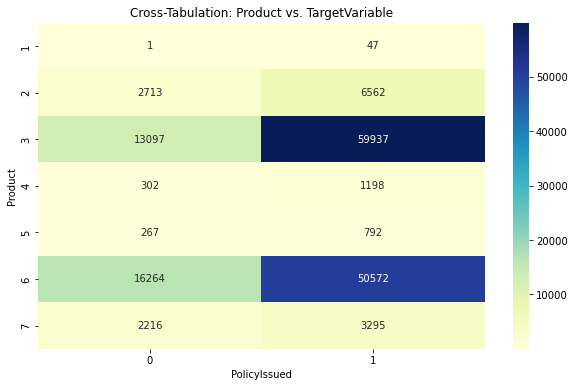

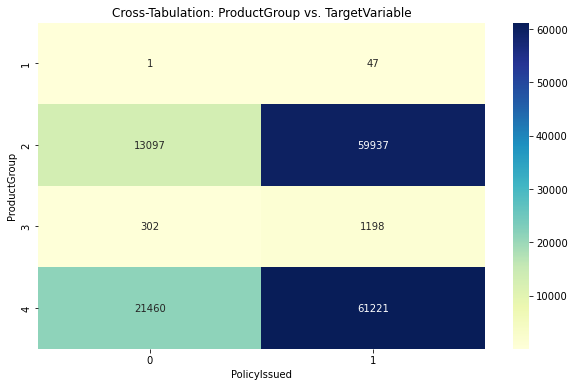

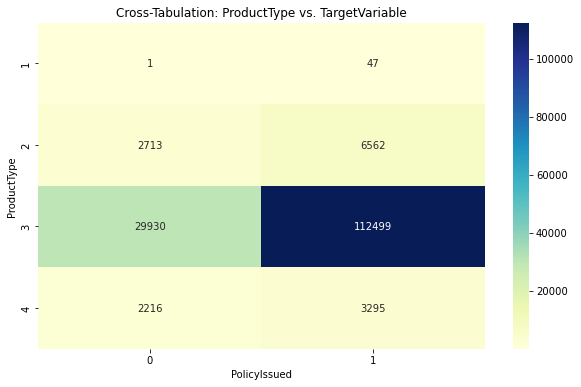

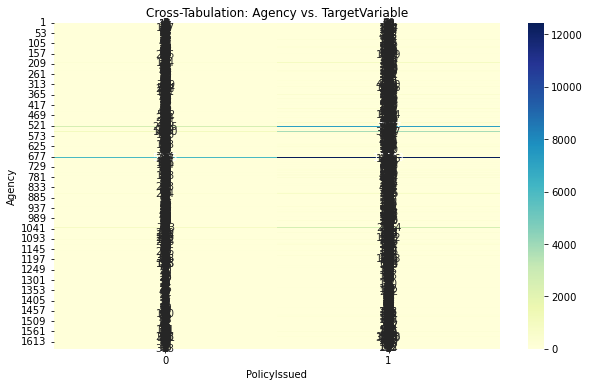

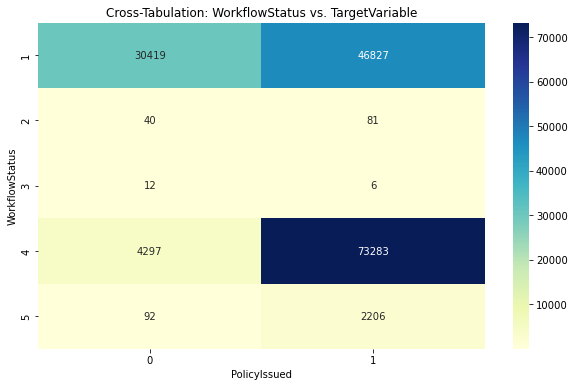

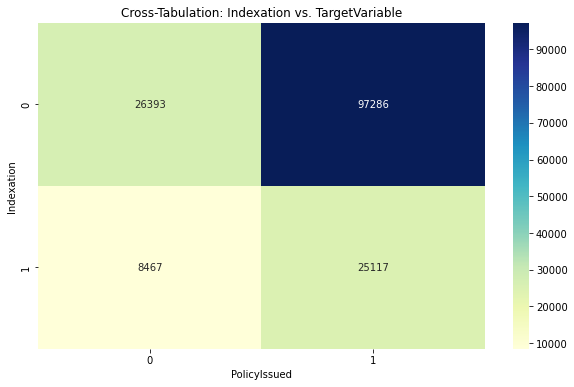

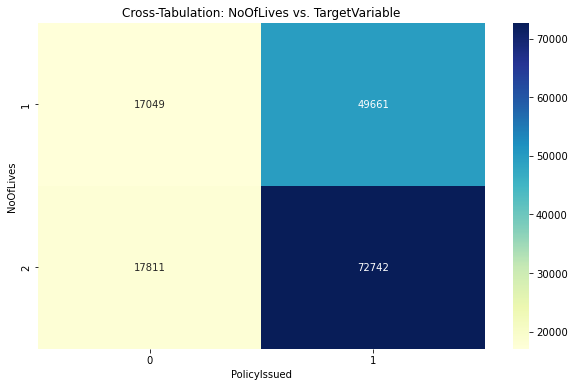

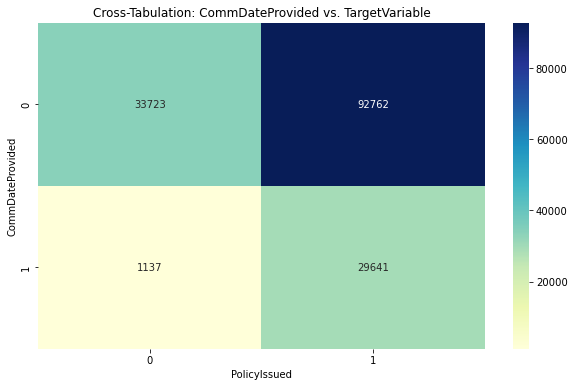

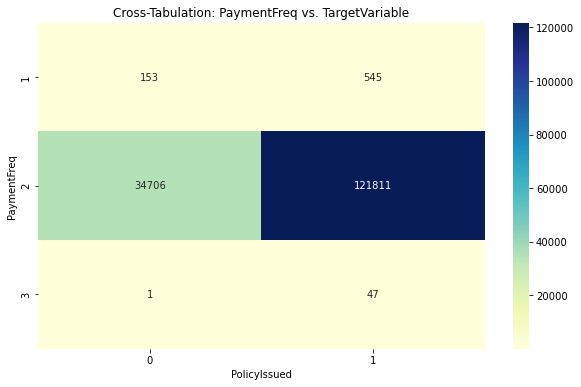

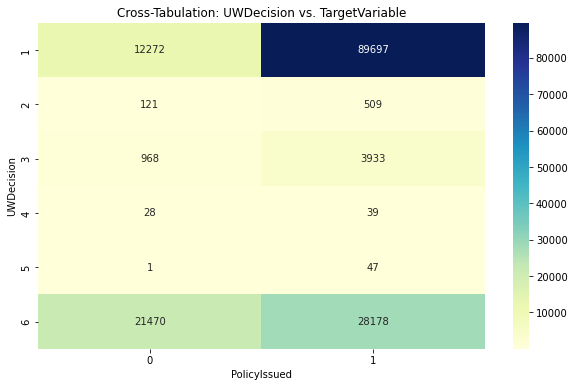

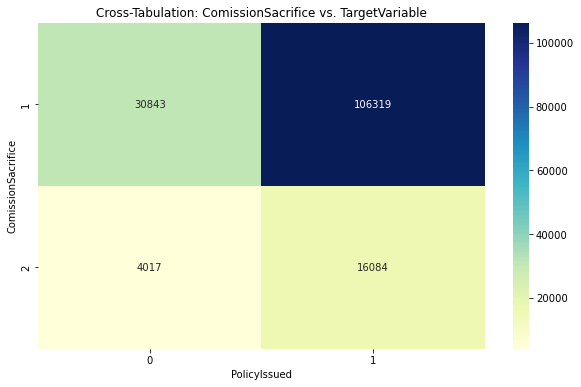

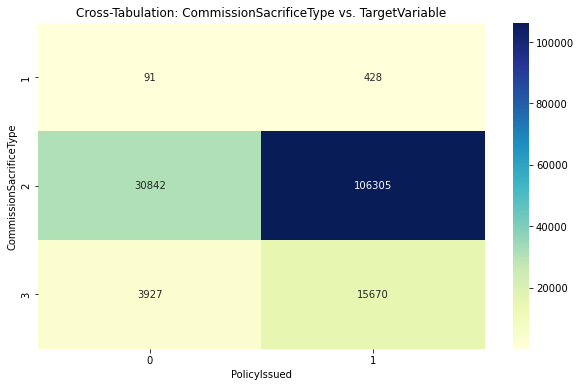

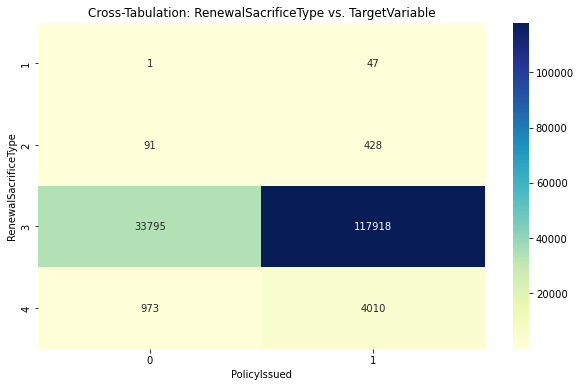

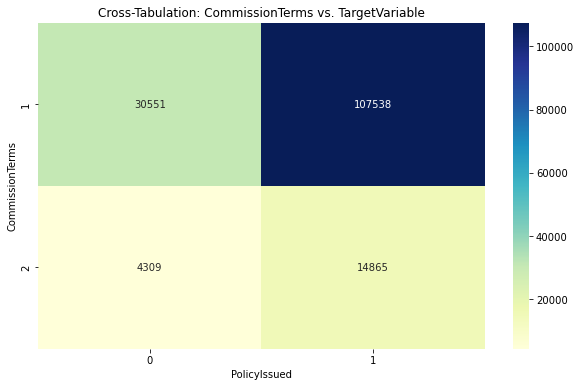

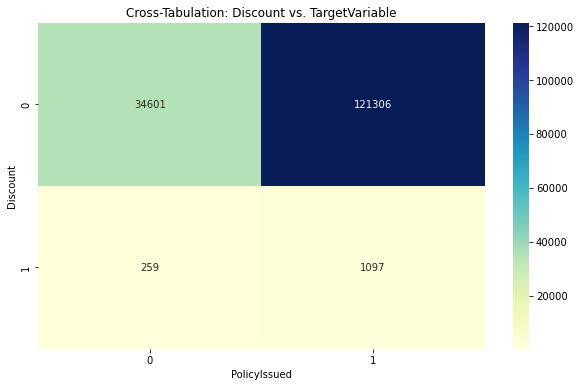

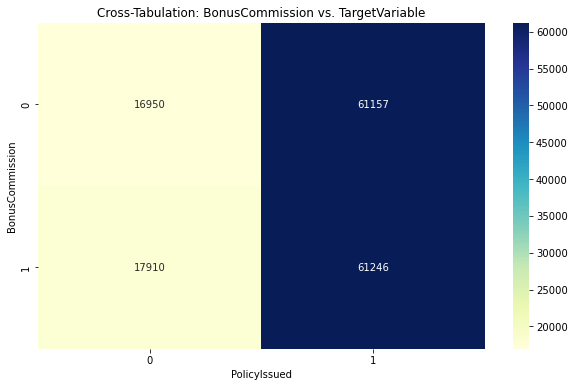

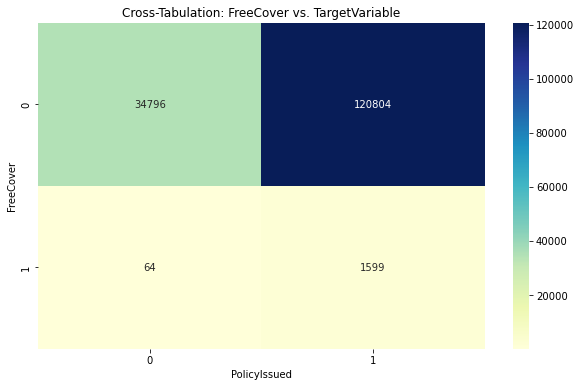

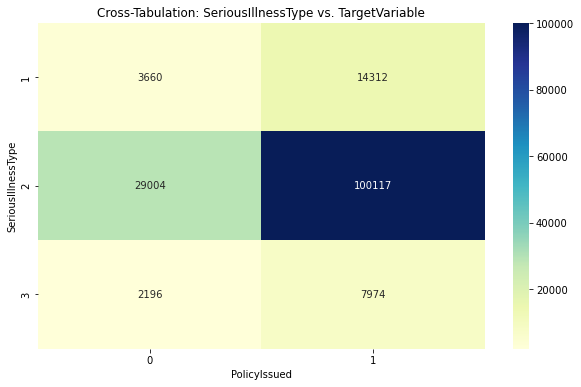

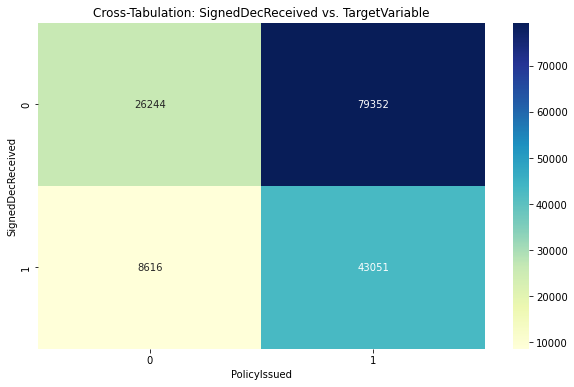

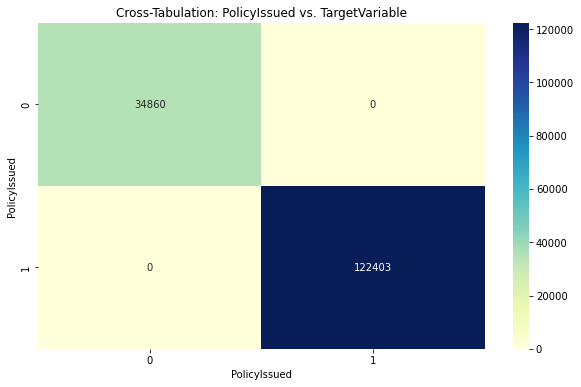

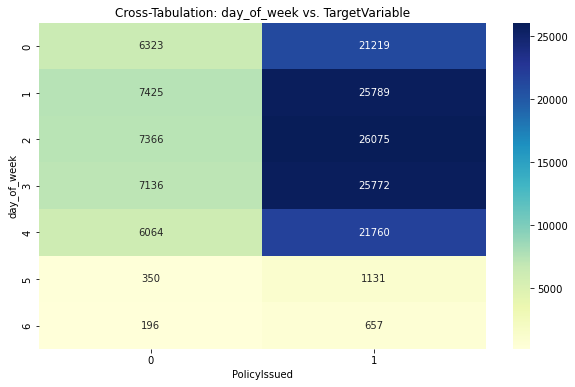

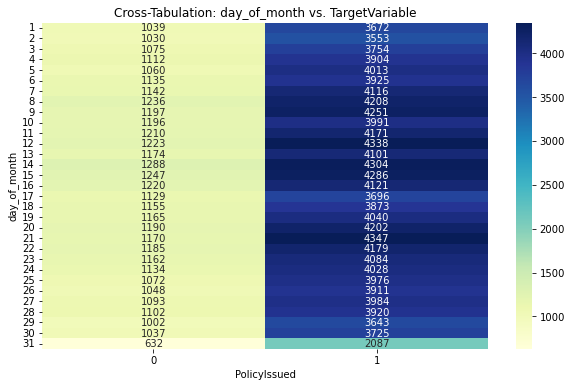

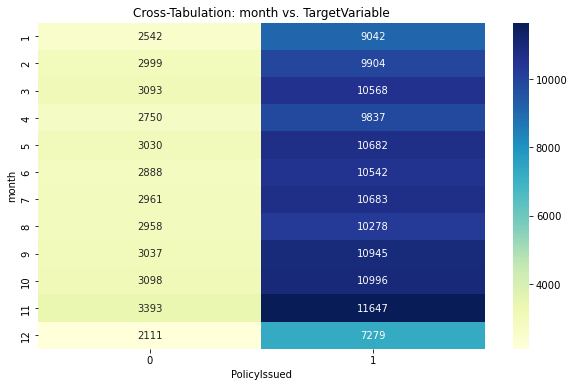

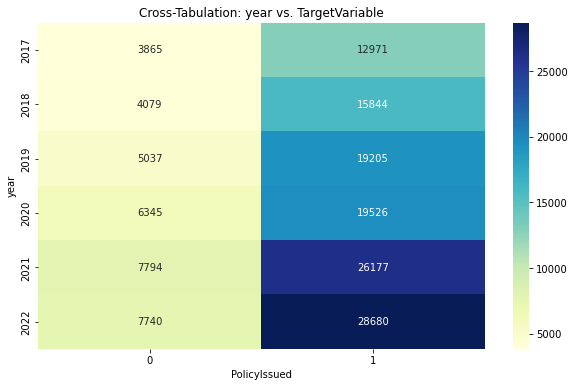

In [18]:
# Perform cross-tabulations between each categorical variable and the target variable
for column in df.select_dtypes(include='category'):
    cross_tab = pd.crosstab(df[column], df['PolicyIssued'])
    
    # Create a heatmap for the cross-tabulation
    plt.figure(figsize=(10, 6))
    sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
    plt.xlabel('PolicyIssued')
    plt.ylabel(column)
    plt.title(f"Cross-Tabulation: {column} vs. TargetVariable")
    plt.show()


### Association Analysis

#### Chi-square Test

Test for significant association between categorical variables.

In [19]:
# Perform chi-square test for each pair of categorical variables
for column1 in df.select_dtypes(include='category'):
    for column2 in df.select_dtypes(include='category'):
        if column1 != column2:
            contingency_table = pd.crosstab(df[column1], df[column2])
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            print(f"Chi-square Test: {column1} vs. {column2}")
            print(f"Chi2 Statistic: {chi2}")
            print(f"P-value: {p_value}")
            print()

Chi-square Test: Product vs. ProductGroup
Chi2 Statistic: 471789.00000000006
P-value: 0.0

Chi-square Test: Product vs. ProductType
Chi2 Statistic: 471789.0
P-value: 0.0

Chi-square Test: Product vs. Agency
Chi2 Statistic: 209289.49436905683
P-value: 0.0

Chi-square Test: Product vs. WorkflowStatus
Chi2 Statistic: 1428.8054904723572
P-value: 3.4496724465441193e-287

Chi-square Test: Product vs. Indexation
Chi2 Statistic: 37656.96152124932
P-value: 0.0

Chi-square Test: Product vs. NoOfLives
Chi2 Statistic: 26549.509562917305
P-value: 0.0

Chi-square Test: Product vs. CommDateProvided
Chi2 Statistic: 1048.38958811731
P-value: 3.0528530634970744e-223

Chi-square Test: Product vs. PaymentFreq
Chi2 Statistic: 157553.88314109645
P-value: 0.0

Chi-square Test: Product vs. UWDecision
Chi2 Statistic: 166093.32055188654
P-value: 0.0

Chi-square Test: Product vs. ComissionSacrifice
Chi2 Statistic: 5473.065993218746
P-value: 0.0

Chi-square Test: Product vs. CommissionSacrificeType
Chi2 Statistic

Chi-square Test: Agency vs. BonusCommission
Chi2 Statistic: 52985.115304498715
P-value: 0.0

Chi-square Test: Agency vs. FreeCover
Chi2 Statistic: 10403.7892298849
P-value: 0.0

Chi-square Test: Agency vs. SeriousIllnessType
Chi2 Statistic: 43517.34428682941
P-value: 0.0

Chi-square Test: Agency vs. SignedDecReceived
Chi2 Statistic: 13795.22902102433
P-value: 0.0

Chi-square Test: Agency vs. PolicyIssued
Chi2 Statistic: 8925.697906379663
P-value: 0.0

Chi-square Test: Agency vs. day_of_week
Chi2 Statistic: 24969.223541292835
P-value: 0.0

Chi-square Test: Agency vs. day_of_month
Chi2 Statistic: 61473.30990387116
P-value: 2.0345129491965334e-278

Chi-square Test: Agency vs. month
Chi2 Statistic: 30271.617305920074
P-value: 0.0

Chi-square Test: Agency vs. year
Chi2 Statistic: 90704.53227163215
P-value: 0.0

Chi-square Test: WorkflowStatus vs. Product
Chi2 Statistic: 1428.8054904723574
P-value: 3.4496724465437256e-287

Chi-square Test: WorkflowStatus vs. ProductGroup
Chi2 Statistic: 737.

Chi-square Test: CommDateProvided vs. Agency
Chi2 Statistic: 28777.5831495586
P-value: 0.0

Chi-square Test: CommDateProvided vs. WorkflowStatus
Chi2 Statistic: 38299.76407973338
P-value: 0.0

Chi-square Test: CommDateProvided vs. Indexation
Chi2 Statistic: 1074.6929761526912
P-value: 1.0453940889109499e-235

Chi-square Test: CommDateProvided vs. NoOfLives
Chi2 Statistic: 370.470348687415
P-value: 1.4783756177996732e-82

Chi-square Test: CommDateProvided vs. PaymentFreq
Chi2 Statistic: 72.2868652000129
P-value: 2.0095863158894902e-16

Chi-square Test: CommDateProvided vs. UWDecision
Chi2 Statistic: 15127.986371886753
P-value: 0.0

Chi-square Test: CommDateProvided vs. ComissionSacrifice
Chi2 Statistic: 228.7222033956651
P-value: 1.1324317075849507e-51

Chi-square Test: CommDateProvided vs. CommissionSacrificeType
Chi2 Statistic: 227.20608705065786
P-value: 4.600712231172894e-50

Chi-square Test: CommDateProvided vs. RenewalSacrificeType
Chi2 Statistic: 386.3736471589476
P-value: 1.9796

Chi-square Test: ComissionSacrifice vs. CommissionTerms
Chi2 Statistic: 310.3994633508055
P-value: 1.7873288598637134e-69

Chi-square Test: ComissionSacrifice vs. Discount
Chi2 Statistic: 81.00312400980167
P-value: 2.253611396803987e-19

Chi-square Test: ComissionSacrifice vs. BonusCommission
Chi2 Statistic: 1391.9835339985225
P-value: 1.1599191434607893e-304

Chi-square Test: ComissionSacrifice vs. FreeCover
Chi2 Statistic: 65.8917132716146
P-value: 4.763904272256486e-16

Chi-square Test: ComissionSacrifice vs. SeriousIllnessType
Chi2 Statistic: 2162.511340488217
P-value: 0.0

Chi-square Test: ComissionSacrifice vs. SignedDecReceived
Chi2 Statistic: 94.47150623682538
P-value: 2.48645931837433e-22

Chi-square Test: ComissionSacrifice vs. PolicyIssued
Chi2 Statistic: 63.489997563825455
P-value: 1.611831843047248e-15

Chi-square Test: ComissionSacrifice vs. day_of_week
Chi2 Statistic: 68.63035517590298
P-value: 7.804563313278267e-13

Chi-square Test: ComissionSacrifice vs. day_of_month
C

Chi-square Test: Discount vs. Product
Chi2 Statistic: 223.79161053912682
P-value: 1.6166980411304995e-45

Chi-square Test: Discount vs. ProductGroup
Chi2 Statistic: 137.9090638486942
P-value: 1.0672823535725006e-29

Chi-square Test: Discount vs. ProductType
Chi2 Statistic: 142.45591299121972
P-value: 1.1165778093516618e-30

Chi-square Test: Discount vs. Agency
Chi2 Statistic: 4145.578602551639
P-value: 3.437202702962982e-215

Chi-square Test: Discount vs. WorkflowStatus
Chi2 Statistic: 25.1189880494495
P-value: 4.7612888969051547e-05

Chi-square Test: Discount vs. Indexation
Chi2 Statistic: 44.361186873329345
P-value: 2.730472368888858e-11

Chi-square Test: Discount vs. NoOfLives
Chi2 Statistic: 147.0103477693648
P-value: 7.806729872605697e-34

Chi-square Test: Discount vs. CommDateProvided
Chi2 Statistic: 331.5766788377031
P-value: 4.359001766190291e-74

Chi-square Test: Discount vs. PaymentFreq
Chi2 Statistic: 6.5192546171468075
P-value: 0.038402707710758315

Chi-square Test: Discoun

Chi-square Test: SeriousIllnessType vs. CommissionTerms
Chi2 Statistic: 202.63095779209226
P-value: 9.98266699595089e-45

Chi-square Test: SeriousIllnessType vs. Discount
Chi2 Statistic: 298.1114855354576
P-value: 1.8446476375294416e-65

Chi-square Test: SeriousIllnessType vs. BonusCommission
Chi2 Statistic: 34735.89684989377
P-value: 0.0

Chi-square Test: SeriousIllnessType vs. FreeCover
Chi2 Statistic: 14.049825047893808
P-value: 0.000889445321368411

Chi-square Test: SeriousIllnessType vs. SignedDecReceived
Chi2 Statistic: 27.586378310093504
P-value: 1.0225723894096491e-06

Chi-square Test: SeriousIllnessType vs. PolicyIssued
Chi2 Statistic: 42.30903796966678
P-value: 6.49694421185627e-10

Chi-square Test: SeriousIllnessType vs. day_of_week
Chi2 Statistic: 89.9561592469654
P-value: 5.034820946607941e-14

Chi-square Test: SeriousIllnessType vs. day_of_month
Chi2 Statistic: 67.42056863849697
P-value: 0.23834505320333083

Chi-square Test: SeriousIllnessType vs. month
Chi2 Statistic: 94

Chi-square Test: day_of_week vs. SeriousIllnessType
Chi2 Statistic: 89.95615924696541
P-value: 5.0348209466079213e-14

Chi-square Test: day_of_week vs. SignedDecReceived
Chi2 Statistic: 12.189425250694402
P-value: 0.05787394168354244

Chi-square Test: day_of_week vs. PolicyIssued
Chi2 Statistic: 19.888896596193522
P-value: 0.00289834058952045

Chi-square Test: day_of_week vs. day_of_month
Chi2 Statistic: 1077.3271372129548
P-value: 1.021404608036389e-127

Chi-square Test: day_of_week vs. month
Chi2 Statistic: 463.69308341471293
P-value: 4.372547829119472e-61

Chi-square Test: day_of_week vs. year
Chi2 Statistic: 246.1313900221623
P-value: 8.44706321038573e-36

Chi-square Test: day_of_month vs. Product
Chi2 Statistic: 202.07394047571347
P-value: 0.12429550407122718

Chi-square Test: day_of_month vs. ProductGroup
Chi2 Statistic: 71.33047547378041
P-value: 0.9265780866663661

Chi-square Test: day_of_month vs. ProductType
Chi2 Statistic: 117.51172840530782
P-value: 0.027363631044873226

Ch

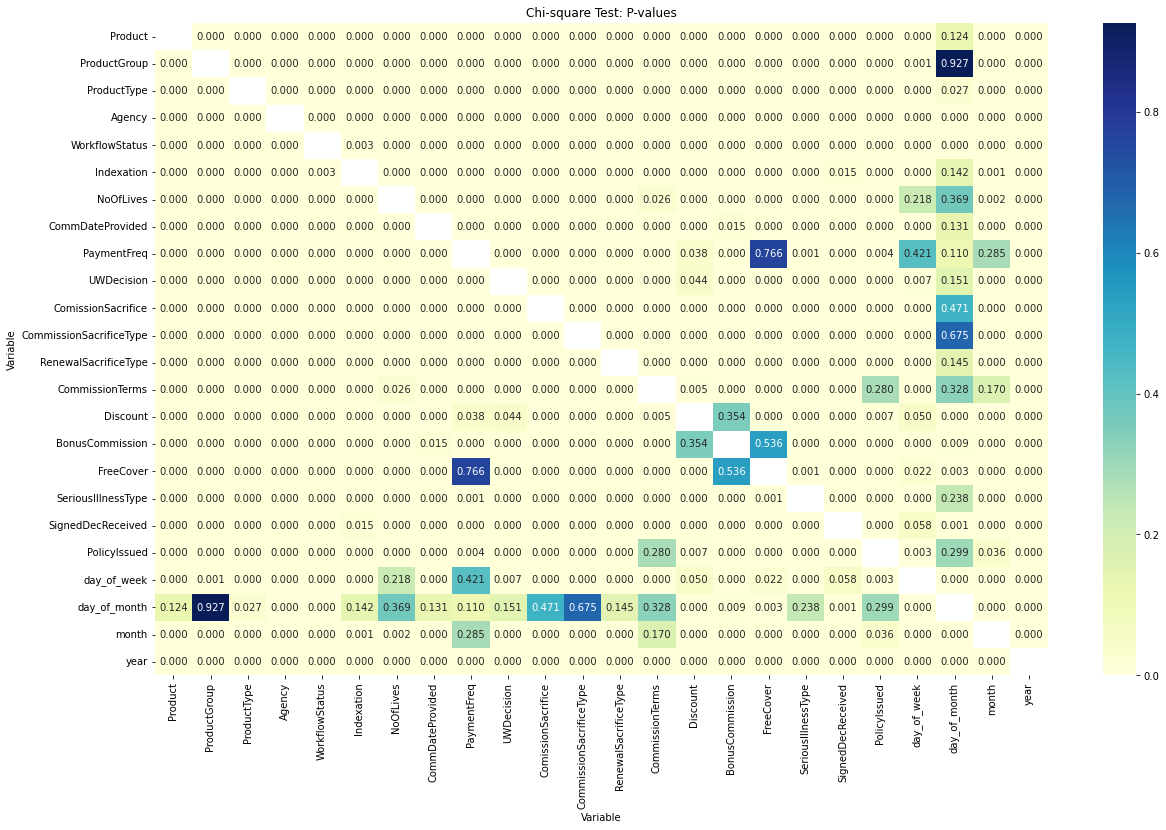

In [20]:
# Create an empty dataframe to store p-values
p_values_df = pd.DataFrame(index=df.select_dtypes(include='category').columns, columns=df.select_dtypes(include='category').columns)

# Perform chi-square test for each pair of categorical variables
for column1 in df.select_dtypes(include='category'):
    for column2 in df.select_dtypes(include='category'):
        if column1 != column2:
            contingency_table = pd.crosstab(df[column1], df[column2])
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            p_values_df.loc[column1, column2] = p_value

# Create a heatmap of the p-values
plt.figure(figsize=(20, 12))
sns.heatmap(p_values_df.astype(float), annot=True, fmt=".3f", cmap='YlGnBu')
plt.xlabel('Variable')
plt.ylabel('Variable')
plt.title('Chi-square Test: P-values')
plt.show()

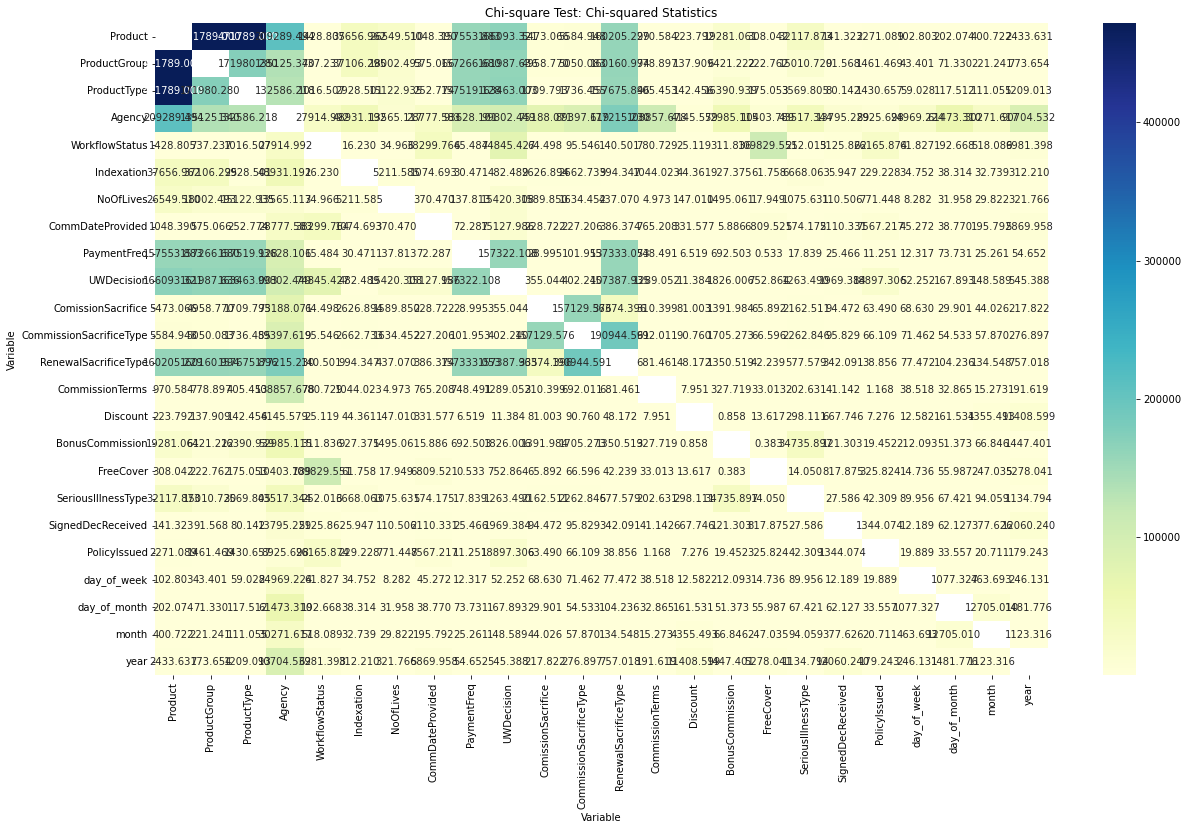

In [21]:
# Create an empty dataframe to store Chi-squared statistics
chi2_stats_df = pd.DataFrame(index=df.select_dtypes(include='category').columns, columns=df.select_dtypes(include='category').columns)

# Perform chi-square test for each pair of categorical variables
for column1 in df.select_dtypes(include='category'):
    for column2 in df.select_dtypes(include='category'):
        if column1 != column2:
            contingency_table = pd.crosstab(df[column1], df[column2])
            chi2_stat, _, _, _ = chi2_contingency(contingency_table)
            chi2_stats_df.loc[column1, column2] = chi2_stat

# Create a heatmap of the Chi-squared statistics
plt.figure(figsize=(20, 12))
sns.heatmap(chi2_stats_df.astype(float), annot=True, fmt=".3f", cmap='YlGnBu')
plt.xlabel('Variable')
plt.ylabel('Variable')
plt.title('Chi-square Test: Chi-squared Statistics')
plt.show()

Higher Chi-squared values indicate a higher difference between actual and predicted frequencies, implying a stronger relationship between the variables being investigated.
A Chi-squared score near to 0 shows that the observed and anticipated frequencies are similar, meaning that no substantial relationship exists between the variables.

A p-value near to one indicates that the observed and predicted frequencies are not significantly different, confirming the null hypothesis of independence.
A p-value near to zero shows that the observed frequencies deviate considerably from the anticipated frequencies, giving strong evidence to reject the null hypothesis and implying a significant association between the variables.

#### PolicyIssued vs. Product, PolicyIssued vs. ProductGroup, PolicyIssued vs. Agency, PolicyIssued vs. WorkflowStatus, PolicyIssued vs. CommDateProvided
The p-value for each of these Chi-square tests is 0.0. This indicates that the factors have a substantial relationship. The results of the Chi-square statistic are relatively high, suggesting significant relationships.
These findings indicate that policy issuance is substantially associated to the variables Product, ProductGroup, Agency, WorkflowStatus, CommDateProvided, and UWDecision. Based on these category characteristics, unique patterns in policy issuing may emerge.


#### ProductType vs. PolicyIssued:
The p-value is quite near to zero, indicating that the relationship between PolicyIssued and ProductType is highly significant.
The Chi-square statistic value is likewise rather high, indicating a strong relationship.
This finding suggests that policy issuance is strongly connected to the ProductType variable. Certain product categories may have a greater influence on policy issuance rates.


#### PolicyIssued versus Indexation, PolicyIssued versus NoOfLives, PolicyIssued versus ComissionSacrifice, PolicyIssued versus CommissionSacrificeType, PolicyIssued versus RenewalSacrificeType, PolicyIssued versus BonusCommission, PolicyIssued versus FreeCover, PolicyIssued:
The p-value in each of these Chi-square tests is quite near to zero, suggesting highly significant connections between the variables.
While the Chi-square statistic values differ amongst different tests, they are all suggestive of moderate to high relationships.
These findings indicate that policy issuance is strongly related to the variables Indexation, NoOfLives, ComissionSacrifice, CommissionSacrificeType, RenewalSacrificeType, BonusCommission, FreeCover, SeriousIllnessType, and SignedDecReceived. These variables are most likely influencing policy issuing decisions.


#### Payment vs. PolicyIssuedDiscount vs. Frequency and PolicyIssued:
The p-values in these tests are less significant (0.0036 and 0.007, respectively) when compared to other tests.
The Chi-square statistic values are modest.
These findings point to a weaker relationship between PolicyIssued and PaymentFreq, as well as PolicyIssued and Discount. While a correlation exists, it may not be as strong as with other factors.


#### CommissionTerms vs. PolicyIssued:
The p-value is 0.2797, which is larger than the standard level of significance of 0.05.
The Chi-square statistic is quite low.
This finding implies that there is no substantial relationship between PolicyIssued and CommissionTerms. The factors might be independent of one another.


In summary, the Chi-square test results indicate significant associations between policy issuance and most of the tested categorical variables (Product, ProductGroup, ProductType, Agency, WorkflowStatus, Indexation, NoOfLives, CommDateProvided, UWDecision, ComissionSacrifice, CommissionSacrificeType, RenewalSacrificeType, BonusCommission, FreeCover, SeriousIllnessType, and SignedDecReceived). The strength of these relationships, however, varies, with some factors having greater links with policy issuance than others. These connections imply that these characteristics may play an essential role in policy issuance choices. Furthermore, PolicyIssued appears to have very little or no relationships with CommissionTerms, PaymentFreq, and Discount.

#### Product
There is a highly significant relationship between the Product variable and all other categorical variables, particularily each of ProductGroup, ProductType, Agency, PaymentFreq, UWDecision, and RenewalSacrificeType. Product is not independent of any of these.

#### ProductGroup
There is a highly significant relationship between the ProductGroup variable and all other categorical variables, particularily each of Product, ProductType, Agency, PaymentFreq, UWDecision, and RenewalSacrificeType. ProductGroup is not independent of any of these.

#### ProductType
There is a highly significant relationship between the ProductType variable and all other categorical variables, particularily each of Product, ProductGroup, Agency, PaymentFreq, UWDecision, and RenewalSacrificeType. ProductType is not independent of any of these.

#### Agency
There is a highly significant relationship between the Agency variable and all other categorical variables, particularily each of Product and RenewalSacrificeType. Agency is not independent of any of these.

#### PaymentFreq
There is a highly significant relationship between the PaymentFreq variable and all other categorical variables (except FreeCover), particularily each of Product, ProductGroup, ProductType, UW Decision and RenewalSacrificeType. PaymentFreq is not independent of any of these.

#### UWDecision
There is a highly significant relationship between the PaymentFreq variable and all other categorical variables, particularily each of Product, ProductGroup, ProductType, PaymentFreq and RenewalSacrificeType. UWDecision is not independent of any of these.

#### RenewalSacrificeType
There is a highly significant relationship between the PaymentFreq variable and all other categorical variables, particularily each of Product, ProductGroup, ProductType, Agency, PaymentFreq, UWDecision and CommissionSacrificeType. RenewalSacrificeType is not independent of any of these.

Commission Sacrtifice has a particularly strong significant relationship with CommissionSacrificeType, and CommissionSacrificeType has a particularly strong significant relationship with RenewalSacrificeType.

The only categorical variable pairs that do not have a sigificant relationship with each other are FreeCover vs PaymentFreq, Discount vs BonusComm, FreeCover Vs BonusComm, and PolicyIssued vs CommissionTerms.

#### Cramers V

Test strength of associaltion between variables

In [22]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = np.sum(confusion_matrix)
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corrected = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    r_corrected = r - ((r - 1) ** 2) / (n - 1)
    k_corrected = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2_corrected / min((k_corrected - 1), (r_corrected - 1)))

# Calculate Cramer's V for each pair of categorical variables
for column1 in df.select_dtypes(include='category'):
    for column2 in df.select_dtypes(include='category'):
        if column1 != column2:
            contingency_table = pd.crosstab(df[column1], df[column2])
            v = cramers_v(contingency_table.values)
            print(f"{column1} vs. {column2}")
            print(f"Cramer's V: {v}")
            print(f"Chi2 Statistic: {chi2}")
            print(f"P-value: {p_value}")
            print()

Product vs. ProductGroup
Cramer's V: 0.9999904615497118
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

Product vs. ProductType
Cramer's V: 0.9999904615497117
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

Product vs. Agency
Cramer's V: 0.4597164575452138
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

Product vs. WorkflowStatus
Cramer's V: 0.04725745439597357
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

Product vs. Indexation
Cramer's V: 0.4893010393866791
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

Product vs. NoOfLives
Cramer's V: 0.41083484822049016
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

Product vs. CommDateProvided
Cramer's V: 0.08141475628860549
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

Product vs. PaymentFreq
Cramer's V: 0.707737979391897
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

Product vs. U

ProductType vs. day_of_month
Cramer's V: 0.007636329467484201
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

ProductType vs. month
Cramer's V: 0.01286267307741201
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

ProductType vs. year
Cramer's V: 0.05030774340265842
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

Agency vs. Product
Cramer's V: 0.4597164575452138
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

Agency vs. ProductGroup
Cramer's V: 0.5253026094789671
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

Agency vs. ProductType
Cramer's V: 0.5201546168664121
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

Agency vs. WorkflowStatus
Cramer's V: 0.18413088086815194
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

Agency vs. Indexation
Cramer's V: 0.5483350924882037
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

Agency vs. NoOfLi

NoOfLives vs. Product
Cramer's V: 0.41083484822049016
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

NoOfLives vs. ProductGroup
Cramer's V: 0.3383126517444038
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

NoOfLives vs. ProductType
Cramer's V: 0.3100723637193913
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

NoOfLives vs. Agency
Cramer's V: 0.2752908242015118
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

NoOfLives vs. WorkflowStatus
Cramer's V: 0.014032266313711898
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

NoOfLives vs. Indexation
Cramer's V: 0.1820251280787097
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

NoOfLives vs. CommDateProvided
Cramer's V: 0.04847054402709158
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

NoOfLives vs. PaymentFreq
Cramer's V: 0.02938722858004851
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-1

PaymentFreq vs. year
Cramer's V: 0.011915015417296159
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

UWDecision vs. Product
Cramer's V: 0.4595634514588482
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

UWDecision vs. ProductGroup
Cramer's V: 0.5859371863699832
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

UWDecision vs. ProductType
Cramer's V: 0.5885997139757647
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

UWDecision vs. Agency
Cramer's V: 0.3412550266596927
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

UWDecision vs. WorkflowStatus
Cramer's V: 0.34489496321166535
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

UWDecision vs. Indexation
Cramer's V: 0.055102331003388835
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

UWDecision vs. NoOfLives
Cramer's V: 0.3130864007046918
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

U

RenewalSacrificeType vs. Product
Cramer's V: 0.5826988770107101
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

RenewalSacrificeType vs. ProductGroup
Cramer's V: 0.5826347884565642
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

RenewalSacrificeType vs. ProductType
Cramer's V: 0.5780967066882651
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

RenewalSacrificeType vs. Agency
Cramer's V: 0.60428297204206
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

RenewalSacrificeType vs. WorkflowStatus
Cramer's V: 0.01650379604580235
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

RenewalSacrificeType vs. Indexation
Cramer's V: 0.0793964320512634
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

RenewalSacrificeType vs. NoOfLives
Cramer's V: 0.052537350906450654
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

RenewalSacrificeType vs. CommDateProvided
Cramer's V: 0

Discount vs. year
Cramer's V: 0.2692830879781128
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

BonusCommission vs. Product
Cramer's V: 0.3500950644588205
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

BonusCommission vs. ProductGroup
Cramer's V: 0.20202051367662002
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

BonusCommission vs. ProductType
Cramer's V: 0.3228124435378803
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

BonusCommission vs. Agency
Cramer's V: 0.5713576136419906
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

BonusCommission vs. WorkflowStatus
Cramer's V: 0.04424334019645515
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

BonusCommission vs. Indexation
Cramer's V: 0.07675055626382755
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

BonusCommission vs. NoOfLives
Cramer's V: 0.09747029414884226
Chi2 Statistic: 1123.3155498033975
P-v

SeriousIllnessType vs. day_of_week
Cramer's V: 0.015743434811187184
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

SeriousIllnessType vs. day_of_month
Cramer's V: 0.004857154455354386
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

SeriousIllnessType vs. month
Cramer's V: 0.015136230911479781
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

SeriousIllnessType vs. year
Cramer's V: 0.059801334295223024
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

SignedDecReceived vs. Product
Cramer's V: 0.029334156391472466
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

SignedDecReceived vs. ProductGroup
Cramer's V: 0.023731561769936835
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

SignedDecReceived vs. ProductType
Cramer's V: 0.022147997073442876
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

SignedDecReceived vs. Agency
Cramer's V: 0.27793574269923327
Chi2 

day_of_week vs. PolicyIssued
Cramer's V: 0.00939769570364514
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

day_of_week vs. day_of_month
Cramer's V: 0.030838589478449308
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

day_of_week vs. month
Cramer's V: 0.020530199588999935
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

day_of_week vs. year
Cramer's V: 0.016579344488715224
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

day_of_month vs. Product
Cramer's V: 0.0048366878002218915
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

day_of_month vs. ProductGroup
Cramer's V: 0.0
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

day_of_month vs. ProductType
Cramer's V: 0.007636329467484199
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

day_of_month vs. Agency
Cramer's V: 0.05057025100614093
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199

d

year vs. month
Cramer's V: 0.036860254347859625
Chi2 Statistic: 1123.3155498033975
P-value: 4.342993608450631e-199



<AxesSubplot:xlabel='Variable 2', ylabel='Variable 1'>

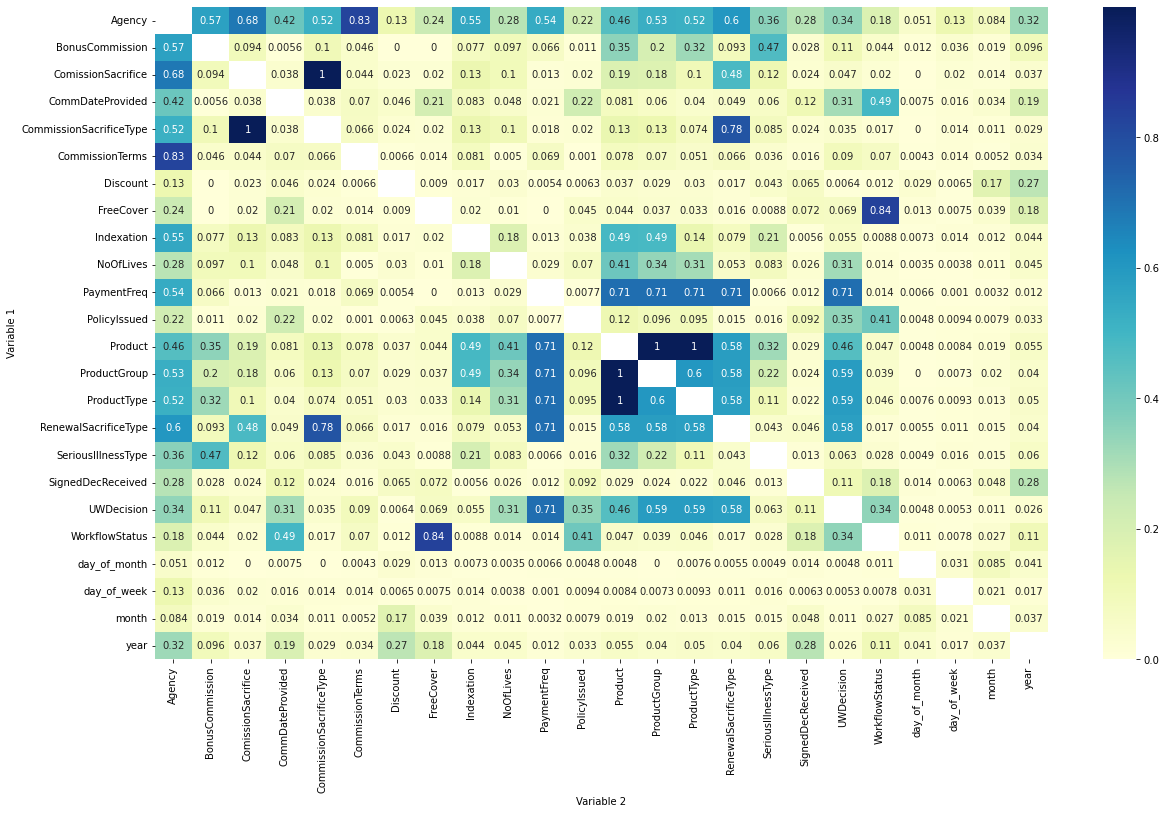

In [23]:
# Create a list to store Cramer's V values
cramer_v_list = []

# Calculate Cramer's V for each pair of categorical variables
for column1 in df.select_dtypes(include='category'):
    for column2 in df.select_dtypes(include='category'):
        if column1 != column2:
            contingency_table = pd.crosstab(df[column1], df[column2])
            v = cramers_v(contingency_table.values)
            cramer_v_list.append({"Variable 1": column1, "Variable 2": column2, "Cramer's V": v})

# Create a dataframe from the list
cramer_v_df = pd.DataFrame(cramer_v_list)

# Create a pivot table for visualization
pivot_table = cramer_v_df.pivot("Variable 1", "Variable 2", "Cramer's V")

# Create a heatmap using seaborn
plt.figure(figsize=(20, 12))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")

A Cramer's V value near to 0 implies that there is little or no relationship between the variables (the variable is closer to independence).

A Cramer's V value greater than 0.5 up to a pefect relationship of 1 indicates a very strong relationship between the variables.

The target variable has no particularly strong relationships with any of the categorical variables. The strongest are only moderately strong, UWDecision (0.35) and WorkflowStatus (0.41). These two also have a moderately strong relationship to eachother at 0.34.

CommissionSacrificeType vs CommissionSacrifice, Product vs ProductGroup, and Product vs ProductType all have perfect relationships.

Agency has a moderate to strong relationship with several other variables.

PaymentFreq has a very strong relationship with each of Product, ProductGroup, ProductType, RenewalSacrificeType, and UWDecision (all 0.71).

### Datetime Variables

#### Summary Statistics

In [24]:
# Calculate minimum and maximum datetime
min_datetime = df['PropDate'].min()
max_datetime = df['PropDate'].max()

# Calculate mean, median, and standard deviation of datetime
mean_datetime = df['PropDate'].mean()
median_datetime = df['PropDate'].median()
std_datetime = df['PropDate'].std()

# Print the summary statistics
print("Minimum datetime:", min_datetime)
print("Maximum datetime:", max_datetime)
print("Mean datetime:", mean_datetime)
print("Median datetime:", median_datetime)
print("Standard deviation of datetime:", std_datetime)

Minimum datetime: 2017-01-02 00:00:00
Maximum datetime: 2022-12-31 00:00:00
Mean datetime: 2020-06-13 03:29:26.383701248
Median datetime: 2020-09-21 00:00:00
Standard deviation of datetime: 615 days 14:01:26.529678528


#### Temporal Patterns

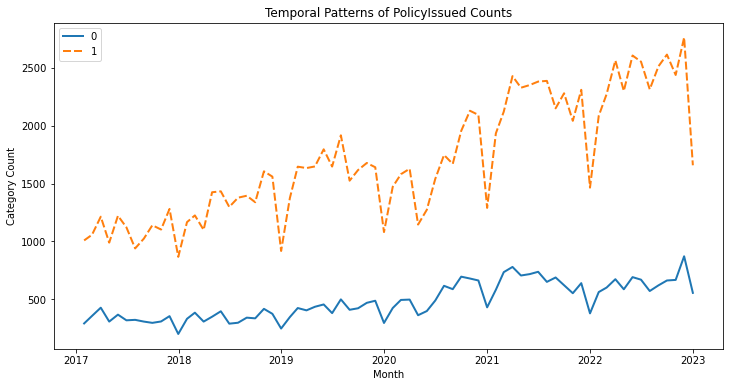

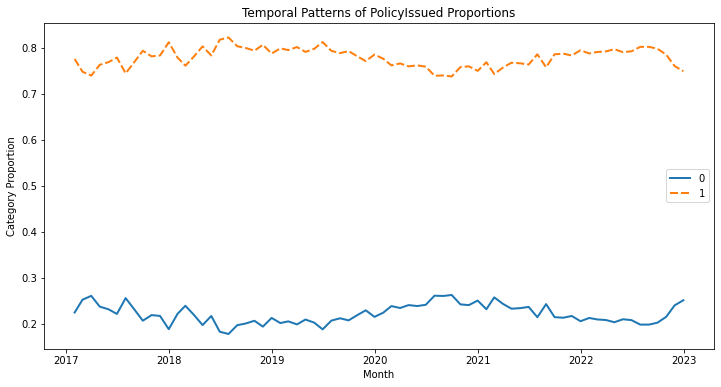

In [25]:
# Set the datetime variable as the index of the DataFrame
df_date = df.copy()
df_date.set_index('PropDate', inplace=True)

# Get the list of categorical column names
categorical_columns = ['PolicyIssued']

# Loop through the categorical columns
for column_name in categorical_columns:
    # Aggregate the data over months
    monthly_data = df_date[column_name].resample('M')

    # Calculate frequency counts of categories within each month
    category_counts = monthly_data.apply(lambda x: x.value_counts()).unstack()

    # Calculate proportions of categories within each month
    category_proportions = monthly_data.apply(lambda x: x.value_counts(normalize=True)).unstack()

    # Plot the temporal patterns of category counts
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(data=category_counts, linewidth=2)
    plt.xlabel('Month')
    plt.ylabel('Category Count')
    plt.title(f'Temporal Patterns of {column_name} Counts')
    ax.legend(labels=['0', '1'])  # Set legend labels
    plt.show()

    # Plot the temporal patterns of category proportions
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(data=category_proportions, linewidth=2)
    plt.xlabel('Month')
    plt.ylabel('Category Proportion')
    plt.title(f'Temporal Patterns of {column_name} Proportions')
    ax.legend(labels=['0', '1'])  # Set legend labels
    plt.show()


In [26]:
# Loop through the categorical columns
for column_name in categorical_columns:
    # Aggregate the data over months
    monthly_data = df_date[column_name].resample('M')

    # Calculate frequency counts of categories within each month
    category_counts = monthly_data.apply(lambda x: x.value_counts()).unstack()

    # Calculate proportions of categories within each month
    category_proportions = monthly_data.apply(lambda x: x.value_counts(normalize=True)).unstack()

    # Display the category counts as a table
    print(f"Temporal Patterns of {column_name} Counts:\n")
    print(category_counts)

    # Display the category proportions as a table
    print(f"\nTemporal Patterns of {column_name} Proportions:\n")
    print(category_proportions)

Temporal Patterns of PolicyIssued Counts:

               1    0
PropDate             
2017-01-31  1009  292
2017-02-28  1058  357
2017-03-31  1214  428
2017-04-30   990  308
2017-05-31  1222  368
...          ...  ...
2022-08-31  2513  621
2022-09-30  2614  663
2022-10-31  2438  668
2022-11-30  2762  872
2022-12-31  1658  556

[72 rows x 2 columns]

Temporal Patterns of PolicyIssued Proportions:

                   1         0
PropDate                      
2017-01-31  0.775557  0.224443
2017-02-28  0.747703  0.252297
2017-03-31  0.739342  0.260658
2017-04-30  0.762712  0.237288
2017-05-31  0.768553  0.231447
...              ...       ...
2022-08-31  0.801851  0.198149
2022-09-30  0.797681  0.202319
2022-10-31  0.784932  0.215068
2022-11-30  0.760044  0.239956
2022-12-31  0.748871  0.251129

[72 rows x 2 columns]


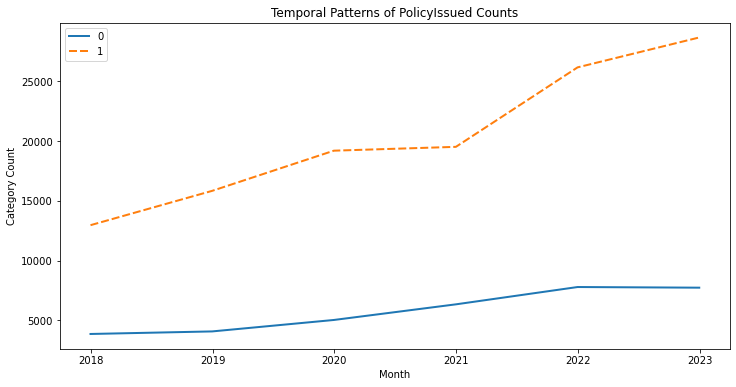

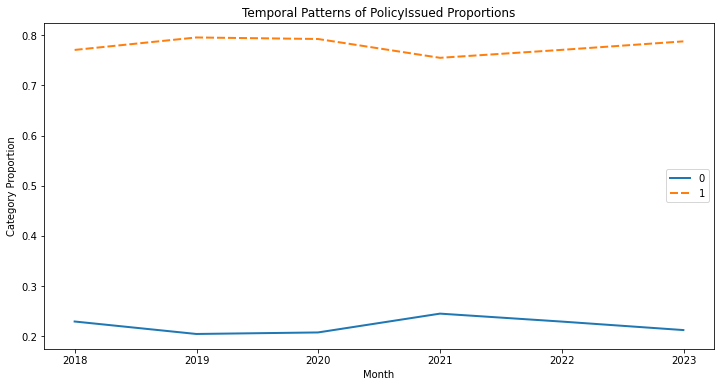

In [27]:
# Loop through the categorical columns
for column_name in categorical_columns:
    # Aggregate the data over months
    monthly_data = df_date[column_name].resample('Y')

    # Calculate frequency counts of categories within each month
    category_counts = monthly_data.apply(lambda x: x.value_counts()).unstack()

    # Calculate proportions of categories within each month
    category_proportions = monthly_data.apply(lambda x: x.value_counts(normalize=True)).unstack()

    # Plot the temporal patterns of category counts
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(data=category_counts, linewidth=2)
    plt.xlabel('Month')
    plt.ylabel('Category Count')
    plt.title(f'Temporal Patterns of {column_name} Counts')
    ax.legend(labels=['0', '1'])  # Set legend labels
    plt.show()

    # Plot the temporal patterns of category proportions
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(data=category_proportions, linewidth=2)
    plt.xlabel('Month')
    plt.ylabel('Category Proportion')
    plt.title(f'Temporal Patterns of {column_name} Proportions')
    ax.legend(labels=['0', '1'])  # Set legend labels
    plt.show()

In [28]:
# Loop through the categorical columns
for column_name in categorical_columns:
    # Aggregate the data over months
    yearly_data = df_date[column_name].resample('Y')

    # Calculate frequency counts of categories within each month
    category_counts = yearly_data.apply(lambda x: x.value_counts()).unstack()

    # Calculate proportions of categories within each month
    category_proportions = yearly_data.apply(lambda x: x.value_counts(normalize=True)).unstack()

    # Display the category counts as a table
    print(f"Temporal Patterns of {column_name} Counts:\n")
    print(category_counts)

    # Display the category proportions as a table
    print(f"\nTemporal Patterns of {column_name} Proportions:\n")
    print(category_proportions)

Temporal Patterns of PolicyIssued Counts:

                1     0
PropDate               
2017-12-31  12971  3865
2018-12-31  15844  4079
2019-12-31  19205  5037
2020-12-31  19526  6345
2021-12-31  26177  7794
2022-12-31  28680  7740

Temporal Patterns of PolicyIssued Proportions:

                   1         0
PropDate                      
2017-12-31  0.770432  0.229568
2018-12-31  0.795262  0.204738
2019-12-31  0.792220  0.207780
2020-12-31  0.754745  0.245255
2021-12-31  0.770569  0.229431
2022-12-31  0.787479  0.212521


Temporal Patterns of PolicyIssued Counts:
The counts for category 1 (1 represents True or "PolicyIssued") show an increasing trend over time, with higher counts in later years.
The counts for category 0 (0 represents False or "PolicyNotIssued") also show an increasing trend but with relatively lower counts compared to category 1.

Temporal Patterns of PolicyIssued Proportions:
The proportions of category 1 (PolicyIssued) remain relatively stable over time, ranging between approximately 0.77 and 0.79. This indicates that around 77% to 79% of the PolicyIssued values are present in the dataset.
The proportions of category 0 (PolicyNotIssued) follow the opposite pattern, ranging between approximately 0.21 and 0.23.
These patterns suggest that there is an increasing trend in the number of policies issued over time, as reflected in both the counts and proportions. 

#### Time-based Grouping

Monthly Data:
            CommissionSacrificePercentage  BonusCommissionPercentage
PropDate                                                            
2017-01-31                       0.477613                   1.202083
2017-02-28                       0.445965                   1.157796
2017-03-31                       0.474574                   1.141019
2017-04-30                       0.409479                   1.075629
2017-05-31                       0.460128                   1.168252
...                                   ...                        ...
2022-08-31                       0.724513                   1.424818
2022-09-30                       0.694173                   1.383823
2022-10-31                       0.708625                   1.375468
2022-11-30                       0.722104                   1.391394
2022-12-31                       0.574350                   1.385777

[72 rows x 2 columns]

Quarterly Data:
            CommissionSacrificePercentage  BonusC

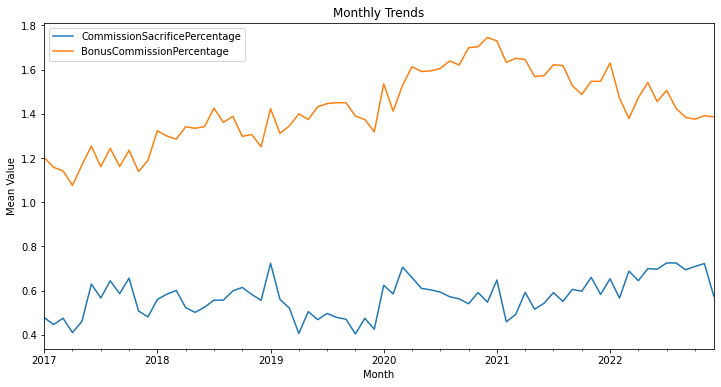

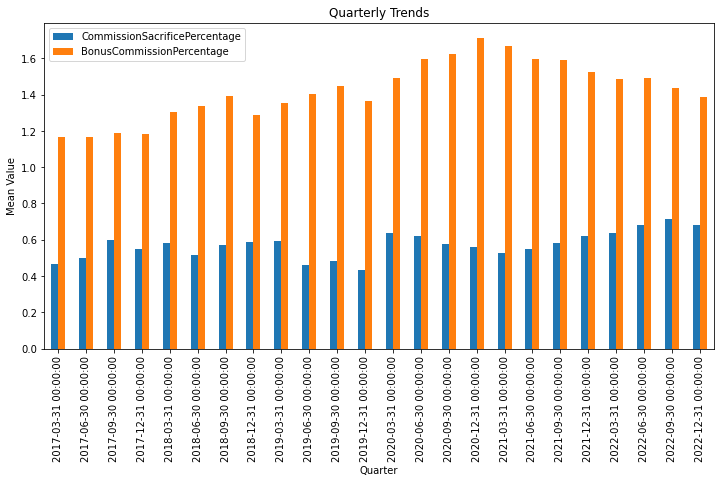

In [29]:
# Set the datetime variable as the index of the DataFrame
df_date = df.copy()
df_date.set_index('PropDate', inplace=True)

# Group the data based on specific time periods (e.g., monthly, quarterly)
# Analyze patterns or trends within each group
monthly_data = df_date.groupby(pd.Grouper(freq='M')).mean()
quarterly_data = df_date.groupby(pd.Grouper(freq='Q')).mean()

# Print the aggregated data for each group
print("Monthly Data:")
print(monthly_data)
print("\nQuarterly Data:")
print(quarterly_data)

# Visualize the trends or patterns within each group
# You can plot line charts, bar charts, or any other appropriate visualization method
monthly_data.plot(kind='line', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Mean Value')
plt.title('Monthly Trends')
plt.show()

quarterly_data.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Quarter')
plt.ylabel('Mean Value')
plt.title('Quarterly Trends')
plt.show()


For CommissionSacrificePercentage:
The values range between approximately 0.43 and 0.71.
There is a general increasing trend over time, with some minor fluctuations.
The highest value is observed in the quarter ending on 2022-09-30, with a value of approximately 0.71.
The lowest value is observed in the quarter ending on 2019-12-31, with a value of approximately 0.43.

For BonusCommissionPercentage:

The values range between approximately 1.16 and 1.71.
There is no clear linear trend, but some fluctuations can be observed.
The highest value is observed in the quarter ending on 2020-12-31, with a value of approximately 1.71.
The lowest value is observed in the quarter ending on 2017-03-31, with a value of approximately 1.16.

### Other Visualisations

In [30]:
# Aggregate PropDate by QuarterYear
df['QuarterYear'] = df['PropDate'].dt.to_period('Q')

# Group the data by QuarterYear and Product and calculate the count of PolicyIssued
grouped_data = df.groupby(['QuarterYear', 'Product'])['PolicyIssued'].count().unstack()

# Calculate the proportion of each product within each quarter
proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)

# Format proportions as percentages
proportions_percentage = proportions.applymap(lambda x: f"{x*100:.2f}%")

# Display the proportions as a table
print(proportions_percentage)


Product          1      2       3      4      5       6      7
QuarterYear                                                   
2017Q1       0.00%  6.33%  37.04%  2.00%  0.00%  48.23%  6.40%
2017Q2       0.07%  6.35%  37.91%  2.01%  0.00%  47.47%  6.19%
2017Q3       0.07%  4.69%  42.52%  1.74%  0.00%  45.30%  5.68%
2017Q4       0.07%  6.17%  44.56%  2.07%  0.00%  42.37%  4.76%
2018Q1       0.04%  4.78%  47.66%  1.51%  0.00%  41.49%  4.52%
2018Q2       0.10%  5.05%  50.93%  1.54%  0.00%  37.88%  4.51%
2018Q3       0.02%  4.32%  51.28%  1.36%  0.00%  38.76%  4.26%
2018Q4       0.10%  5.68%  49.29%  1.40%  0.08%  38.97%  4.49%
2019Q1       0.05%  4.75%  48.68%  1.22%  1.18%  40.24%  3.88%
2019Q2       0.06%  4.13%  50.44%  1.13%  0.80%  39.42%  4.01%
2019Q3       0.05%  4.10%  48.95%  1.27%  0.91%  40.32%  4.41%
2019Q4       0.05%  5.62%  44.62%  1.11%  2.33%  41.62%  4.63%
2020Q1       0.03%  4.57%  41.99%  1.02%  2.16%  46.73%  3.49%
2020Q2       0.04%  3.26%  40.71%  0.67%  0.82%  51.87%

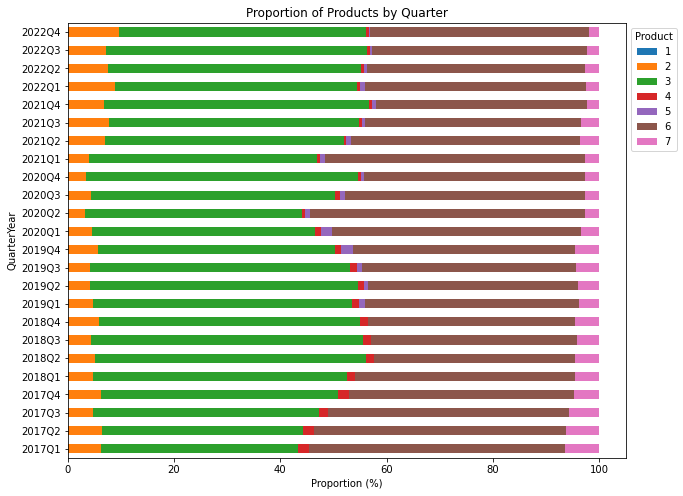

In [31]:
# Aggregate PropDate by QuarterYear
df['QuarterYear'] = df['PropDate'].dt.to_period('Q')

# Group the data by QuarterYear and Product and calculate the count of PolicyIssued
grouped_data = df.groupby(['QuarterYear', 'Product'])['PolicyIssued'].count().unstack()

# Calculate the proportion of each product within each quarter
proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)

# Format proportions as percentages
proportions_percentage = proportions.apply(lambda x: x * 100)

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal stacked bar chart
proportions_percentage.plot(kind='barh', stacked=True, ax=ax)

# Set the y-axis label
ax.set_ylabel('QuarterYear')

# Set the x-axis label
ax.set_xlabel('Proportion (%)')

# Set the chart title
ax.set_title('Proportion of Products by Quarter')

# Move the legend outside the chart
ax.legend(title='Product', bbox_to_anchor=(1, 1), loc='upper left')

# Display the chart
plt.show()


Product Distribution: The proportions of different products vary across quarters. Some products consistently maintain a high proportion, while others fluctuate over time.

Dominant Products: Products 3 and 6 appear to be the most dominant throughout the given period. They consistently have higher proportions compared to other products in most quarters.

Product Variability: Products 2, 4, and 7 also show noticeable variations in their proportions over time. Their proportions fluctuate, indicating changes in their popularity or demand.

Low Proportions: Products 1 and 5 generally have very low proportions throughout the period, often close to or at 0%. This suggests that these products have relatively lower demand or utilization compared to others.

<Figure size 720x432 with 0 Axes>

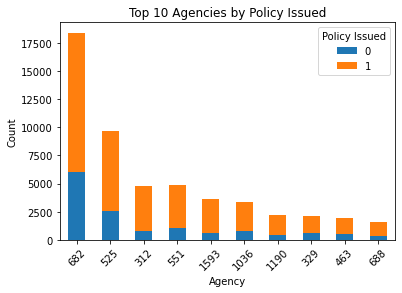

In [32]:
# Convert 'PolicyIssued' column to numeric data type
df['PolicyIssued'] = pd.to_numeric(df['PolicyIssued'])

# Group the data by Agency and calculate the sum of PolicyIssued
grouped_data = df.groupby('Agency')['PolicyIssued'].sum()

# Sort the data in descending order and select the top 10 agencies
top_10_agencies = grouped_data.nlargest(10)

# Get the index labels (agency names)
agencies = top_10_agencies.index

# Create an empty DataFrame to store the stacked values
data = pd.DataFrame(index=agencies)

# Iterate over the policy issued values for each agency
for policy in [0, 1]:
    # Get the policy issued values for the current policy category
    policy_values = df[df['Agency'].isin(agencies) & (df['PolicyIssued'] == policy)].groupby('Agency')['PolicyIssued'].count()

    # Add the policy values to the data DataFrame
    data[f'{policy}'] = policy_values

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
data.plot(kind='bar', stacked=True)
plt.xlabel('Agency')
plt.ylabel('Count')
plt.title('Top 10 Agencies by Policy Issued')
plt.xticks(rotation=45)
plt.legend(title='Policy Issued')
plt.show()


In [33]:
# Create a DataFrame to store the results
table = pd.DataFrame({'Agency': top_10_agencies.index, 'PolicyIssued': top_10_agencies.values})

# Display the table
print(table)


  Agency  PolicyIssued
0    682         12443
1    525          7127
2    312          4020
3    551          3797
4   1593          3040
5   1036          2554
6   1190          1793
7    329          1496
8    463          1354
9    688          1226


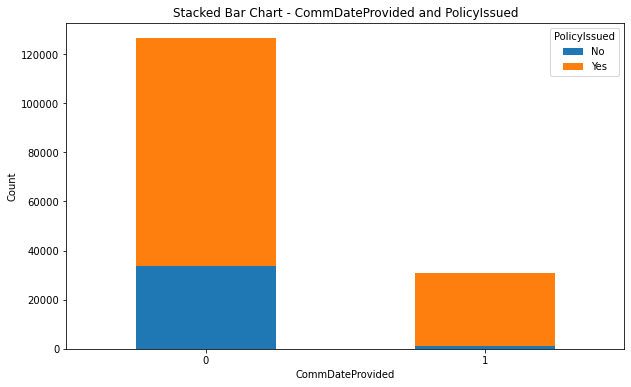

In [34]:
# Group the data by CommDateProvided and PolicyIssued (1 or 0)
comm_date_counts = df.groupby(['CommDateProvided', 'PolicyIssued']).size().unstack()

# Plot the stacked bar chart
comm_date_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('CommDateProvided')
plt.ylabel('Count')
plt.title('Stacked Bar Chart - CommDateProvided and PolicyIssued')
plt.legend(title='PolicyIssued', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

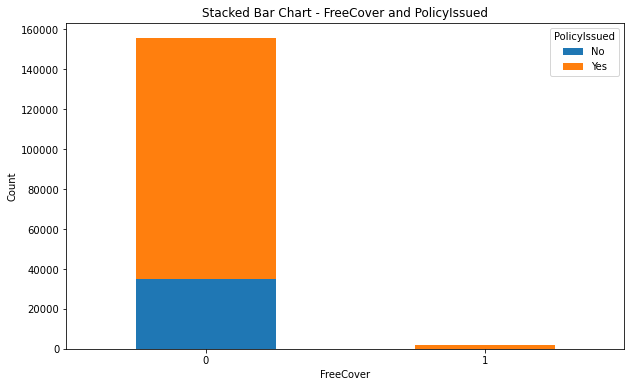

In [35]:
# Group the data by FreeCover and PolicyIssued (1 or 0)
free_cover_counts = df.groupby(['FreeCover', 'PolicyIssued']).size().unstack()

# Plot the stacked bar chart
free_cover_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('FreeCover')
plt.ylabel('Count')
plt.title('Stacked Bar Chart - FreeCover and PolicyIssued')
plt.legend(title='PolicyIssued', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

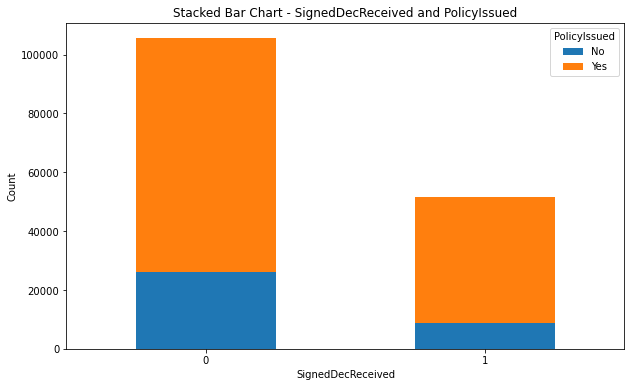

In [36]:
# Group the data by SignedDecReceived and PolicyIssued (1 or 0)
signed_dec_counts = df.groupby(['SignedDecReceived', 'PolicyIssued']).size().unstack()

# Plot the stacked bar chart
signed_dec_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('SignedDecReceived')
plt.ylabel('Count')
plt.title('Stacked Bar Chart - SignedDecReceived and PolicyIssued')
plt.legend(title='PolicyIssued', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

### Correlation Analysis

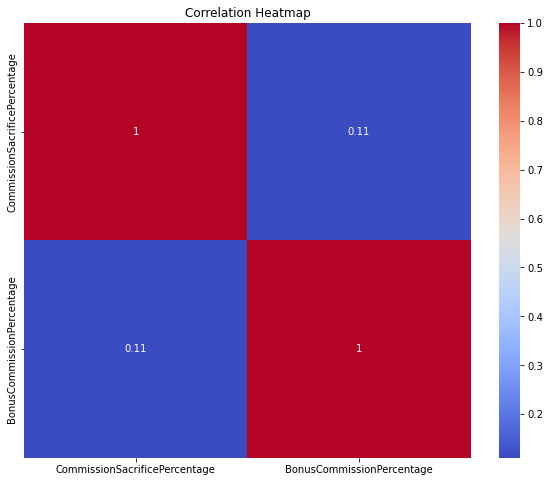

In [37]:
# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [38]:
# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix as a table
correlation_table = correlation_matrix.round(2)
print(correlation_table)

                               CommissionSacrificePercentage  \
CommissionSacrificePercentage                           1.00   
BonusCommissionPercentage                               0.11   

                               BonusCommissionPercentage  
CommissionSacrificePercentage                       0.11  
BonusCommissionPercentage                           1.00  


The correlation coefficient between "CommissionSacrificePercentage" and "BonusCommissionPercentage" is 0.11. This value suggests a weak positive correlation between the two variables. It indicates that there is a slight tendency for both variables to increase together, but the relationship is not very strong.

In [39]:
# Select the target variable and all other columns as predictors
target_variable = 'PolicyIssued'
predictor_variables = [col for col in df.columns if col != target_variable]

# Create a subset of the dataframe with the selected variables
df_subset = df[[target_variable] + predictor_variables]

# Compute the correlation matrix
correlation_matrix = df_subset.corr()

# Identify variables highly correlated with the target variable
target_correlations = correlation_matrix[target_variable].abs().sort_values(ascending=False)
highly_correlated_target = target_correlations[target_correlations > 0.8]  # Adjust the threshold as needed

# Identify variables highly correlated with each other
corr_threshold = 0.8 # Set the correlation threshold for identifying highly correlated variables
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Print the results
print("Variables highly correlated with the target variable:")
print(highly_correlated_target)
print("\nVariables highly correlated with each other:")
for var1, var2 in highly_correlated_pairs:
    print(f"{var1} and {var2}")


Variables highly correlated with the target variable:
PolicyIssued    1.0
Name: PolicyIssued, dtype: float64

Variables highly correlated with each other:


#### Identify features with strongest relationship with dependant variable

Based on the Cramer's V and p-values, the features that are highly correlated with PolicyIssued and are likely to be important predictors are:

Agency:
Cramer's V = 0.2151

WorkflowStatus:
Cramer's V = 0.4079

CommDateProvided:
Cramer's V = 0.2193

UWDecision:
Cramer's V = 0.3466